**1.	[10%] Proponga las tareas de aprendizaje, técnicas y algoritmos de machine learning que va a utilizar para lograr los objetivos que persigue la organización. Recuerde explicarles a los directivos de la organización que lo contrata, la razón por la cual su propuesta es apropiada.**


El objetivo del proyecto es determinar la relación entre los factores de influencia asociados a los accidentes de tránsito y la gravedad de este a partir de datos históricos, con el fin de obtener un conocimiento que apoye en el desarrollo de planes de prevención. Para ello, se interpretan las variables dadas de la siguiente forma:

Variable de decisión: severidad del accidente (leve, serio, fatal).

Variables explicativas: número de vehículos involucrados, número de víctimas, día, tipo de vía, límite de velocidad, tipo de iluminación, clima, condiciones de la vía, condiciones especiales y tipo de área.

Se puede identificar que se trata de una tarea de aprendizado supervisado, dado que se tiene conocimiento de la variable objetivo. Así mismo, la tarea correcta a aplicar es la clasificación, dado que la variable objetivo es categórica. Por último, se escoge como algoritmo a implementar a los árboles de decisión, dado que es muy transparente para el negocio interpretar cómo la decisión en un criterio afecta el resultado de la variable objetivo.




## 1. Carga de librerías necesarias para implementación

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 30) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
import numpy as np
np.random.seed(3301)

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#Librerías para la visualización
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 
from sklearn import tree


# Para construir un modelo con el algoritmo de regresión lineal
from sklearn.linear_model import LinearRegression
# Para determinar el rendimiento del modelo con las métricas MSE, MAE y R2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Para sacar un reporte estadístico que podemos usar para determinar las importancia de las variables explicativas.
import statsmodels.api as sm 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2. Cargar los datos

In [ ]:
# Se cargan los datos. 
df=pd.read_csv('EmpleadosAlpes_muestra.csv', sep=';', encoding = 'utf-8', index_col=False)

## 3. Perfilamiento y entendimiento de los datos 

In [ ]:
df.shape

(7, 17)

Se tienen 2809 filas y 12 variables

In [ ]:
df.head()

,Edad,ViajesNegocio,Distancia_casa,ID_empleado,Satisfacción_ambiente,Genero,Compromiso,Satisfaccion_trabajo,Estado_civil,Ingreso_mensual,SobreTiempo,Horas_Produccion,Bonos,Años_trabajando,Años_Compañia,Años_Rol_Actual,Años_Actual_Jefe
0,31,Pocos,3,1591,1,Mujer,3.0,4,Divorciado,2211,Si,80,1,2,3,1.0,3
1,40,Pocos,8,1484,1,Mujer,2.0,4,Casado,9958,Si,80,1,11,8,8.0,4
2,24,Frecuentes,7,647,5,Mujer,3.0,3,Casado,2886,Si,80,1,6,60,3.0,2
3,33,Pocos,7,156,2,Hombre,NaN,3,Soltero,6083,Si,80,0,9,9,7.0,6
4,33,Ninguno,2,240,4,Hombre,NaN,4,Soltero,5903,Si,80,0,8,8,NaN,4


In [ ]:
# Revisar las características de los datos: completitud y tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Edad                   7 non-null      int64  
 1   ViajesNegocio          7 non-null      object 
 2   Distancia_casa         7 non-null      int64  
 3   ID_empleado            7 non-null      int64  
 4   Satisfacción_ambiente  7 non-null      int64  
 5   Genero                 7 non-null      object 
 6   Compromiso             5 non-null      float64
 7   Satisfaccion_trabajo   7 non-null      int64  
 8   Estado_civil           7 non-null      object 
 9   Ingreso_mensual        7 non-null      int64  
 10  SobreTiempo            7 non-null      object 
 11  Horas_Produccion       7 non-null      int64  
 12  Bonos                  7 non-null      int64  
 13  Años_trabajando        7 non-null      int64  
 14  Años_Compañia          7 non-null      int64  
 15  Años_Rol_A

Se puede ver todas las ariables, a execepción de ViajesMegocio, Genero, Estado_civil y SobreTiempo ya fueron identificadas como numéricas. Por lo tanto, se deberá hacer una exploración de las variables para ajustar esto. Así mismo, se analizarán las otras variables (categóricas) para identificar anomalías en los datos. Primero, se calculan las ausencias por atributo.

In [ ]:
# Se observa que hay ausencias. 
df.isnull().sum()

Edad                     0
ViajesNegocio            0
Distancia_casa           0
ID_empleado              0
Satisfacción_ambiente    0
Genero                   0
Compromiso               2
Satisfaccion_trabajo     0
Estado_civil             0
Ingreso_mensual          0
SobreTiempo              0
Horas_Produccion         0
Bonos                    0
Años_trabajando          0
Años_Compañia            0
Años_Rol_Actual          1
Años_Actual_Jefe         0
dtype: int64

In [ ]:
# Resumen de los estadisticos de las variables numéricas
df.describe()

,Edad,Distancia_casa,ID_empleado,Satisfacción_ambiente,Compromiso,Satisfaccion_trabajo,Ingreso_mensual,Horas_Produccion,Bonos,Años_trabajando,Años_Compañia,Años_Rol_Actual,Años_Actual_Jefe
count,7.000000,7.000000,7.000000,7.000000,5.000000,7.000000,7.000000,7.0,7.000000,7.000000,7.000000,6.000000,7.000000
mean,33.000000,7.142857,1050.857143,2.428571,2.400000,3.285714,6305.571429,80.0,0.714286,8.428571,14.714286,5.666667,4.285714
std,5.656854,4.220133,681.022376,1.618347,0.547723,1.112697,3056.341105,0.0,0.487950,3.505098,20.064183,2.943920,1.704336
min,24.000000,2.000000,156.000000,1.000000,2.000000,1.000000,2211.000000,80.0,0.000000,2.000000,3.000000,1.000000,2.000000
25%,30.500000,5.000000,443.500000,1.000000,2.000000,3.000000,4394.500000,80.0,0.500000,7.000000,7.500000,4.000000,3.500000
50%,33.000000,7.000000,1484.000000,2.000000,2.000000,4.000000,6083.000000,80.0,1.000000,9.000000,8.000000,7.000000,4.000000
75%,36.500000,8.000000,1537.500000,3.500000,3.000000,4.000000,8549.000000,80.0,1.000000,11.000000,8.500000,7.750000,5.000000
max,40.000000,15.000000,1754.000000,5.000000,3.000000,4.000000,9958.000000,80.0,1.000000,12.000000,60.000000,8.000000,7.000000


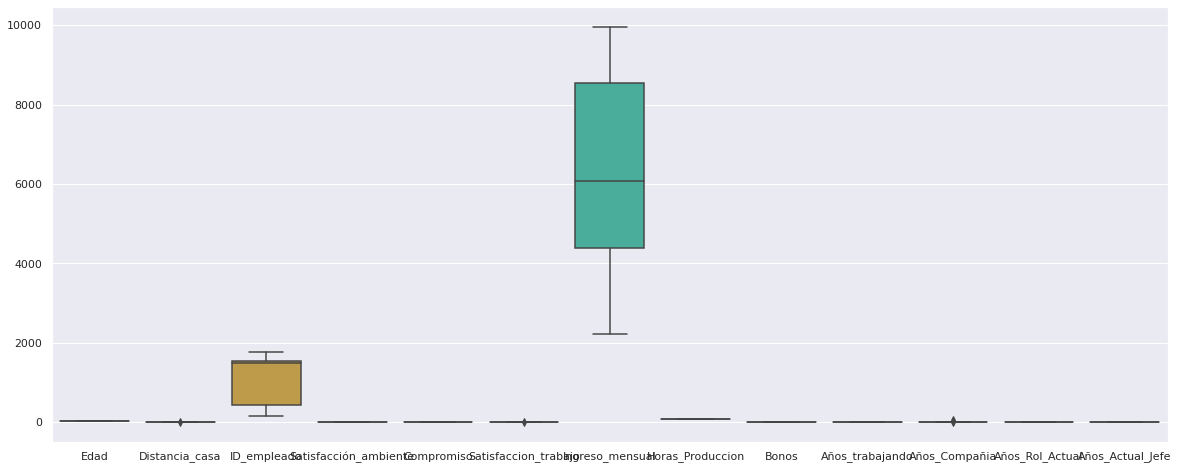

In [ ]:
#Visualización de todas las variables numéricas
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df, orient="v")

In [ ]:
# Explorar las variables que no son numéricas
name_cols_non_number = df.select_dtypes(include = ['object']).columns
name_cols_non_number

Index(['ViajesNegocio', 'Genero', 'Estado_civil', 'SobreTiempo'], dtype='object')

estas variables se pueden convertir en numéricas más adelante

### Revisaremos los valores que tiene cada columna

In [ ]:
#Se visualizan todos los valores

# Lista de nombres de columnas
lista = df.columns.tolist()

#Revisar diferentes valores que hay en las columnas para hacer limpieza
for i in lista:
  datos_ver=df[i].value_counts().to_frame()
  print(datos_ver)


    Edad
40     2
33     2
31     1
24     1
30     1
            ViajesNegocio
Pocos                   5
Frecuentes              1
Ninguno                 1
    Distancia_casa
8                2
7                2
3                1
2                1
15               1
      ID_empleado
1484            2
1591            1
647             1
156             1
240             1
1754            1
   Satisfacción_ambiente
1                      3
5                      1
2                      1
4                      1
3                      1
        Genero
Mujer        4
Hombre       2
M            1
     Compromiso
2.0           3
3.0           2
   Satisfaccion_trabajo
4                     4
3                     2
1                     1
            Estado_civil
Casado                 3
Divorciado             2
Soltero                2
      Ingreso_mensual
9958                2
2211                1
2886                1
6083                1
5903                1
7140            

Se decide eliminar la columna SobreTiempo y Horas_Produccion, debido a casi no hay valores No en la primera; y todos los valores son 80 en la segunda. Entonces se entienden como variable constantes que entorpecen al algoritmo

In [ ]:
#Se visualizan todos los valores
atributo = "Satisfaccion_trabajo"
df[atributo].value_counts().to_frame()

,Satisfaccion_trabajo
4,4
3,2
1,1


In [ ]:
#Revisar el contenido de las variables que no son numéricas
df[name_cols_non_number].describe()

,ViajesNegocio,Genero,Estado_civil,SobreTiempo
count,7,7,7,7
unique,3,3,3,2
top,Pocos,Mujer,Casado,Si
freq,5,4,3,6


In [ ]:
# Lista de nombres de columnas
lista = df.columns.tolist()

#Revisar diferentes valores que hay en las columnas para hacer limpieza
for i in lista:
  datos_ver=df.groupby([i]).size()
  print(datos_ver)
  print('-'*20)

Edad
24    1
30    1
31    1
33    2
40    2
dtype: int64
--------------------
ViajesNegocio
Frecuentes    1
Ninguno       1
Pocos         5
dtype: int64
--------------------
Distancia_casa
2     1
3     1
7     2
8     2
15    1
dtype: int64
--------------------
ID_empleado
156     1
240     1
647     1
1484    2
1591    1
1754    1
dtype: int64
--------------------
Satisfacción_ambiente
1    3
2    1
3    1
4    1
5    1
dtype: int64
--------------------
Genero
Hombre    2
M         1
Mujer     4
dtype: int64
--------------------
Compromiso
2.0    3
3.0    2
dtype: int64
--------------------
Satisfaccion_trabajo
1    1
3    2
4    4
dtype: int64
--------------------
Estado_civil
Casado        3
Divorciado    2
Soltero       2
dtype: int64
--------------------
Ingreso_mensual
2211    1
2886    1
5903    1
6083    1
7140    1
9958    2
dtype: int64
--------------------
SobreTiempo
No    1
Si    6
dtype: int64
--------------------
Horas_Produccion
80    7
dtype: int64
------------------

###**Análisis** 
**2.	[30%] Describa y haga un análisis del resultado del perfilamiento de los datos suministrados (anexos a este enunciado).**
1. Se observa que todas las variables no númericas podrían  ser convertidas a numéricas.
2. Hay variables con varios valores nulos, así como errores de formato, o fuera de rango como:
  
*   Genero, tiene errores de formato como "M". 

*   Dia_semana presenta valores mayores a 7 que no tienen sentido pues se trata del día de la semana.

*   Limite_velocidad, tienen valores negativos que no tienen sentido pues el límite de velocidad no puede ser menos a 0.

*   Iluminacion presenta un tipo de dato fuera del establecido por el diccionario "0".

3. ID_empleado es prescindible para la tarea.


Estos análisis nos ayudan a entender el conjunto de datos y a identificar posibles tareas de limpieza que debo realizar antes de generar un modelo.

## 4. Limpieza de datos


#####Eliminación de registros con ausencias, duplicados y columnas prescindibles

In [ ]:
# Es recomendable que todos los pasos de limpieza y preparación se realicen sobre otro archivo.
datos_l = df

In [ ]:
# Eliminación registros con ausencias
datos_l = datos_l.dropna()
# Eliminación de registros duplicados.
datos_l = datos_l.drop_duplicates()
#Se elimina la variable "ID", "SobreTiempo" y "Horas_Produccion"
datos_l = datos_l.drop(['ID_empleado', 'SobreTiempo', 'Horas_Produccion'],axis=1)

datos_l.shape

(4, 14)

#####Conversión variables decimales a enteros

In [ ]:
#Convertir los valores decimales en Compromiso a enteros
datos_l['Compromiso']=pd.to_numeric(datos_l.Compromiso, errors = 'coerce')
datos_l = datos_l.dropna()
datos_l['Compromiso']=datos_l['Compromiso'].round(0).astype(int)
#datos_ver=datos_l.groupby(["Compromiso"]).size()
#datos_ver
atributo = "Compromiso"
datos_l[atributo].value_counts().to_frame()

,Compromiso
3,2
2,2


In [ ]:
#Convertir los valores decimales en Años_Rol_Actual a enteros
datos_l['Años_Rol_Actual']=pd.to_numeric(datos_l.Años_Rol_Actual, errors = 'coerce')
datos_l = datos_l.dropna()
datos_l['Años_Rol_Actual']=datos_l['Años_Rol_Actual'].round(0).astype(int)
#datos_ver=datos_l.groupby(["Compromiso"]).size()
#datos_ver
atributo = "Años_Rol_Actual"
datos_l[atributo].value_counts().to_frame()

,Años_Rol_Actual
1,1
8,1
3,1
7,1


#####Eliminación datos fuera de rango en variables numéricas

In [ ]:
'''#Eliminaremos las filas que contienen datos fuera de rango en:

#Numero_victimas,  valores  mayores a 15
datos_l = datos_l.drop(datos_l[datos_l['Numero_victimas']>15].index)

#Dia_semana  valores  mayores a 7.
datos_l = datos_l.drop(datos_l[datos_l['Dia_semana']>7].index)

#Limite_velocidad valores mayores a 150 y menores o iguales a 0
datos_l = datos_l.drop(datos_l[datos_l['Limite_velocidad']>150].index)
datos_l = datos_l.drop(datos_l[datos_l['Limite_velocidad']<=0].index)

#Iluminacion valor no válido "0".
datos_l = datos_l.drop(datos_l[datos_l['Iluminacion']=="0"].index)
datos_l.shape
'''

'#Eliminaremos las filas que contienen datos fuera de rango en:\n\n#Numero_victimas,  valores  mayores a 15\ndatos_l = datos_l.drop(datos_l[datos_l[\'Numero_victimas\']>15].index)\n\n#Dia_semana  valores  mayores a 7.\ndatos_l = datos_l.drop(datos_l[datos_l[\'Dia_semana\']>7].index)\n\n#Limite_velocidad valores mayores a 150 y menores o iguales a 0\ndatos_l = datos_l.drop(datos_l[datos_l[\'Limite_velocidad\']>150].index)\ndatos_l = datos_l.drop(datos_l[datos_l[\'Limite_velocidad\']<=0].index)\n\n#Iluminacion valor no válido "0".\ndatos_l = datos_l.drop(datos_l[datos_l[\'Iluminacion\']=="0"].index)\ndatos_l.shape\n'

In [ ]:
#Verificar que los cambios se aplicaron correctamente
# Lista de nombres de columnas
lista = datos_l.columns.tolist()

#Revisar diferentes valores que hay en las columnas para hacer limpieza
for i in lista:
  datos_ver=datos_l[i].value_counts().to_frame()
  print(datos_ver)

    Edad
31     1
40     1
24     1
30     1
            ViajesNegocio
Pocos                   3
Frecuentes              1
    Distancia_casa
3                1
8                1
7                1
15               1
   Satisfacción_ambiente
1                      2
5                      1
3                      1
       Genero
Mujer       3
M           1
   Compromiso
3           2
2           2
   Satisfaccion_trabajo
4                     2
3                     1
1                     1
            Estado_civil
Divorciado             2
Casado                 2
      Ingreso_mensual
2211                1
9958                1
2886                1
7140                1
   Bonos
1      4
    Años_trabajando
2                 1
11                1
6                 1
12                1
    Años_Compañia
3               1
8               1
60              1
7               1
   Años_Rol_Actual
1                1
8                1
3                1
7                1
   Años_Actual

#####Crear nuevas columnas para convertir las variables tipo object a numéricas

**Explique las tareas de transformación que hizo e justifíquelas.**

Se crearán nuevas columnas para convertir las columnas 'ViajesNegocio', 'Genero', 'Estado_civil' de tipo objetc en numéricas.

**1. ViajesNegocio
*   Pocos=0
*   Frecuentes=1
*   Ninguno=2**
*   Carretera acceso=3
*   Un solo sentido=4

**2. Genero
*   Mujer=0
*   Hombre=1**

*   Oscuridad con luces encendidas=2
*   Oscuridad sin iluminacion=3

**3. Estado_civil
*   Soltero=0
*   Casado =1
*   Divorciado=2**

*   Niebla=3
*   Nieve=4
*   Nieve y ventoso  =5
*   Ventoso=6

4. Condicion_via
*   Con nieve=0
*   Hielo=1
*   Rotonda=2
*   Inundada=3
*   Seca=4


5. Tipo_area
*  Rural=0
*  Urbano=1

6. Severidad_accidente             

*  Fatal=0
*  Leve=1
*  Serio=2




In [ ]:
#Crear nuevas columnas para convertir las columnas 'ViajesNegocio', 'Genero', 'Estado_civil' de tipo objetc en categóricas

#Estado_civil
def numeric_Estado_civil(row):
    if row['Estado_civil'] =="Soltero" :
      return 0
    elif row['Estado_civil'] =="Casado" :
      return 1
    elif row['Estado_civil'] =="Divorciado" :
      return 2
datos_l['Estado_civil_numeric']=datos_l.apply (lambda row: numeric_Estado_civil(row), axis=1)    


#Genero
def numeric_Genero(row):
    if row['Genero'] =="Mujer"   :
      return 0
    elif row['Genero'] =="Hombre" :
      return 0   
    else:
      return row['Genero'] 
datos_l['Genero_numeric']=datos_l.apply (lambda row: numeric_Genero(row), axis=1)    



'''
#Genero
def numeric_Genero(row):
    if row['Genero'] =="Mujer"  or "M" :
      return 0
    elif row['Genero'] =="Hombre" :
      return 0   
datos_l['Genero_numeric']=datos_l.apply (lambda row: numeric_Genero(row), axis=1)    

'''

#ViajesNegocioViajesNegocio
def numeric_ViajesNegocio(row):
    if row['ViajesNegocio'] =="Pocos" :
      return 0
    elif row['ViajesNegocio'] =="Ninguno" :
      return 2
    return 1
datos_l['ViajesNegocio_numeric']=datos_l.apply (lambda row: numeric_ViajesNegocio(row), axis=1)    

'''#Severidad_accidente
def numeric_Severidad_accidente(row):
    if row['Severidad_accidente'] =="Fatal" :
      return 0
    elif row['Severidad_accidente'] =="Leve" :
      return 1
    elif row['Severidad_accidente'] =="Serio" :
      return 2
datos_l['Severidad_accidente_numeric']=datos_l.apply (lambda row: numeric_Severidad_accidente(row), axis=1) 

#Iluminacion
def numeric_Iluminacion(row):
    if row['Iluminacion'] =="Luz_dia" :
      return 0
    elif row['Iluminacion'] =="Oscuridad con luces apagadas" :
      return 1
    elif row['Iluminacion'] =="Oscuridad con luces encendidas" :
      return 2
    elif row['Iluminacion'] =="Oscuridad sin iluminacion" :
      return 3

datos_l['Iluminacion_numeric']=datos_l.apply (lambda row: numeric_Iluminacion(row), axis=1)    

#Clima
def numeric_Clima(row):
    if row['Clima'] =="Bueno" :
      return 0
    elif row['Clima'] =="LLuvioso y ventoso" :
      return 1
    elif row['Clima'] =="Lluvioso" :
      return 2
    elif row['Clima'] =="Niebla" :
      return 3
    elif row['Clima'] =="Nieve" :
      return 4
    elif row['Clima'] =="Nieve y ventoso" :
      return 5
    elif row['Clima'] =="Ventoso" :
      return 6

datos_l['Clima_numeric']=datos_l.apply (lambda row: numeric_Clima(row), axis=1) 

#Condicion_via
def numeric_Condicion_via(row):
    if row['Condicion_via'] =="Con nieve" :
      return 0
    elif row['Condicion_via'] =="Hielo" :
      return 1
    elif row['Condicion_via'] =="Humeda" :
      return 2
    elif row['Condicion_via'] =="Inundada" :
      return 3
    elif row['Condicion_via'] =="Seca" :
      return 4
datos_l['Condicion_via_numeric']=datos_l.apply (lambda row: numeric_Condicion_via(row), axis=1)   ''' 

'#Severidad_accidente\ndef numeric_Severidad_accidente(row):\n    if row[\'Severidad_accidente\'] =="Fatal" :\n      return 0\n    elif row[\'Severidad_accidente\'] =="Leve" :\n      return 1\n    elif row[\'Severidad_accidente\'] =="Serio" :\n      return 2\ndatos_l[\'Severidad_accidente_numeric\']=datos_l.apply (lambda row: numeric_Severidad_accidente(row), axis=1) \n\n#Iluminacion\ndef numeric_Iluminacion(row):\n    if row[\'Iluminacion\'] =="Luz_dia" :\n      return 0\n    elif row[\'Iluminacion\'] =="Oscuridad con luces apagadas" :\n      return 1\n    elif row[\'Iluminacion\'] =="Oscuridad con luces encendidas" :\n      return 2\n    elif row[\'Iluminacion\'] =="Oscuridad sin iluminacion" :\n      return 3\n\ndatos_l[\'Iluminacion_numeric\']=datos_l.apply (lambda row: numeric_Iluminacion(row), axis=1)    \n\n#Clima\ndef numeric_Clima(row):\n    if row[\'Clima\'] =="Bueno" :\n      return 0\n    elif row[\'Clima\'] =="LLuvioso y ventoso" :\n      return 1\n    elif row[\'Clima\'] 

In [ ]:
datos_l.head()

,Edad,ViajesNegocio,Distancia_casa,Satisfacción_ambiente,Genero,Compromiso,Satisfaccion_trabajo,Estado_civil,Ingreso_mensual,Bonos,Años_trabajando,Años_Compañia,Años_Rol_Actual,Años_Actual_Jefe,Estado_civil_numeric,Genero_numeric,ViajesNegocio_numeric
0,31,Pocos,3,1,Mujer,3,4,Divorciado,2211,1,2,3,1,3,2,0,0
1,40,Pocos,8,1,Mujer,2,4,Casado,9958,1,11,8,8,4,1,0,0
2,24,Frecuentes,7,5,Mujer,3,3,Casado,2886,1,6,60,3,2,1,0,1
5,30,Pocos,15,3,M,2,1,Divorciado,7140,1,12,7,7,7,2,M,0


In [ ]:
#Verificar que los cambios se aplicaron correctamente
# Lista de nombres de columnas
lista = datos_l.columns.tolist()

#Revisar diferentes valores que hay en las columnas para hacer limpieza
for i in lista:
  datos_ver=datos_l[i].value_counts().to_frame()
  print(datos_ver)
  print('-'*25)

    Edad
31     1
40     1
24     1
30     1
-------------------------
            ViajesNegocio
Pocos                   3
Frecuentes              1
-------------------------
    Distancia_casa
3                1
8                1
7                1
15               1
-------------------------
   Satisfacción_ambiente
1                      2
5                      1
3                      1
-------------------------
       Genero
Mujer       3
M           1
-------------------------
   Compromiso
3           2
2           2
-------------------------
   Satisfaccion_trabajo
4                     2
3                     1
1                     1
-------------------------
            Estado_civil
Divorciado             2
Casado                 2
-------------------------
      Ingreso_mensual
2211                1
9958                1
2886                1
7140                1
-------------------------
   Bonos
1      4
-------------------------
    Años_trabajando
2                 1

#####Corregir errores de formato en Gender

In [ ]:
# Transformamos  la columnas que contienen datos con errores de formato en floats: Genero

datos_l['new_Genero'] = pd.to_numeric(datos_l.Genero_numeric, errors = 'coerce')
#df_prep['new_PURCHASES_TRX'] = pd.to_numeric(df_prep.PURCHASES_TRX, errors = 'coerce')
#df_prep['new_MINIMUM_PAYMENTS'] = pd.to_numeric(df_prep.MINIMUM_PAYMENTS, errors = 'coerce')
#df_prep['new_TENURE'] = pd.to_numeric(df_prep.TENURE, errors = 'coerce')


#Probaremos primero con new_CASH_ADVANCE
datos_l['new_Genero'].sample(4)

5    NaN
2    0.0
0    0.0
1    0.0
Name: new_Genero, dtype: float64

In [ ]:
# Revisemos los valores que tuvieron problema para su conversión y propongamos opciones de transformación
# Veamos las variables Genero_numeric y new_Genero
datos_l.loc[datos_l.new_Genero.isna(), ['Genero_numeric','new_Genero']] 

,Genero_numeric,new_Genero
5,M,NaN


In [ ]:
# Corregimos, cambiando M por Mujer 
new_Genero_f = datos_l.Genero_numeric[datos_l.new_Genero.isna()]
new_Genero_f = new_Genero_f.apply(lambda s: pd.to_numeric(str(s).replace('M','0')))
datos_l.loc[datos_l.new_Genero.isna(),'new_Genero'] = new_Genero_f 

#Pasar a entero
datos_l['new_Genero']=datos_l['new_Genero'].round(0).astype(int)

# Mirar resultados
datos_l[['Genero_numeric','new_Genero']].sample(4)
#pd.unique(df_prep['new_CASH_ADVANCE'])

,Genero_numeric,new_Genero
1,0,0
5,M,0
0,0,0
2,0,0


####Finalizar limpieza y preparación de datos

In [ ]:
#Acá se eliminan  las variables 'ViajesNegocio', 'Genero', 'Estado_civil'  que ya no se necesitan
datos_t = datos_l.drop(['ViajesNegocio', 'Genero', 'Estado_civil', 'Genero_numeric'],axis=1)
datos_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 5
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Edad                   4 non-null      int64
 1   Distancia_casa         4 non-null      int64
 2   Satisfacción_ambiente  4 non-null      int64
 3   Compromiso             4 non-null      int64
 4   Satisfaccion_trabajo   4 non-null      int64
 5   Ingreso_mensual        4 non-null      int64
 6   Bonos                  4 non-null      int64
 7   Años_trabajando        4 non-null      int64
 8   Años_Compañia          4 non-null      int64
 9   Años_Rol_Actual        4 non-null      int64
 10  Años_Actual_Jefe       4 non-null      int64
 11  Estado_civil_numeric   4 non-null      int64
 12  ViajesNegocio_numeric  4 non-null      int64
 13  new_Genero             4 non-null      int64
dtypes: int64(14)
memory usage: 480.0 bytes


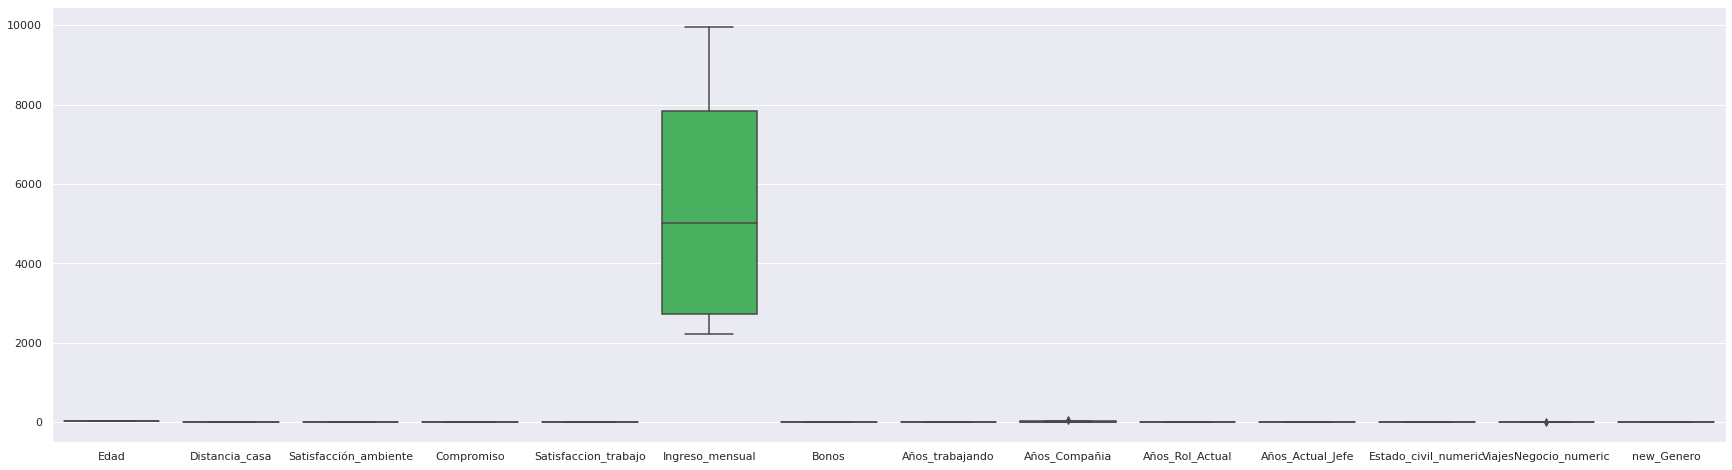

In [ ]:
#Visualización de todas las variables numéricas
fig=plt.figure(figsize=(30,8))
ax = sns.boxplot(data=datos_t, orient="v")

In [ ]:
datos_t.shape

(4, 14)

**Muestre un subconjunto de los datos luego del pre-procesamiento, para ilustrar cómo quedan los datos que utilizará para aplicar los algoritmos de aprendizaje.**

In [ ]:
datos_t.sample(4)

,Edad,Distancia_casa,Satisfacción_ambiente,Compromiso,Satisfaccion_trabajo,Ingreso_mensual,Bonos,Años_trabajando,Años_Compañia,Años_Rol_Actual,Años_Actual_Jefe,Estado_civil_numeric,ViajesNegocio_numeric,new_Genero
0,31,3,1,3,4,2211,1,2,3,1,3,2,0,0
5,30,15,3,2,1,7140,1,12,7,7,7,2,0,0
2,24,7,5,3,3,2886,1,6,60,3,2,1,1,0
1,40,8,1,2,4,9958,1,11,8,8,4,1,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2bf0dbd910>,
      dtype=object)

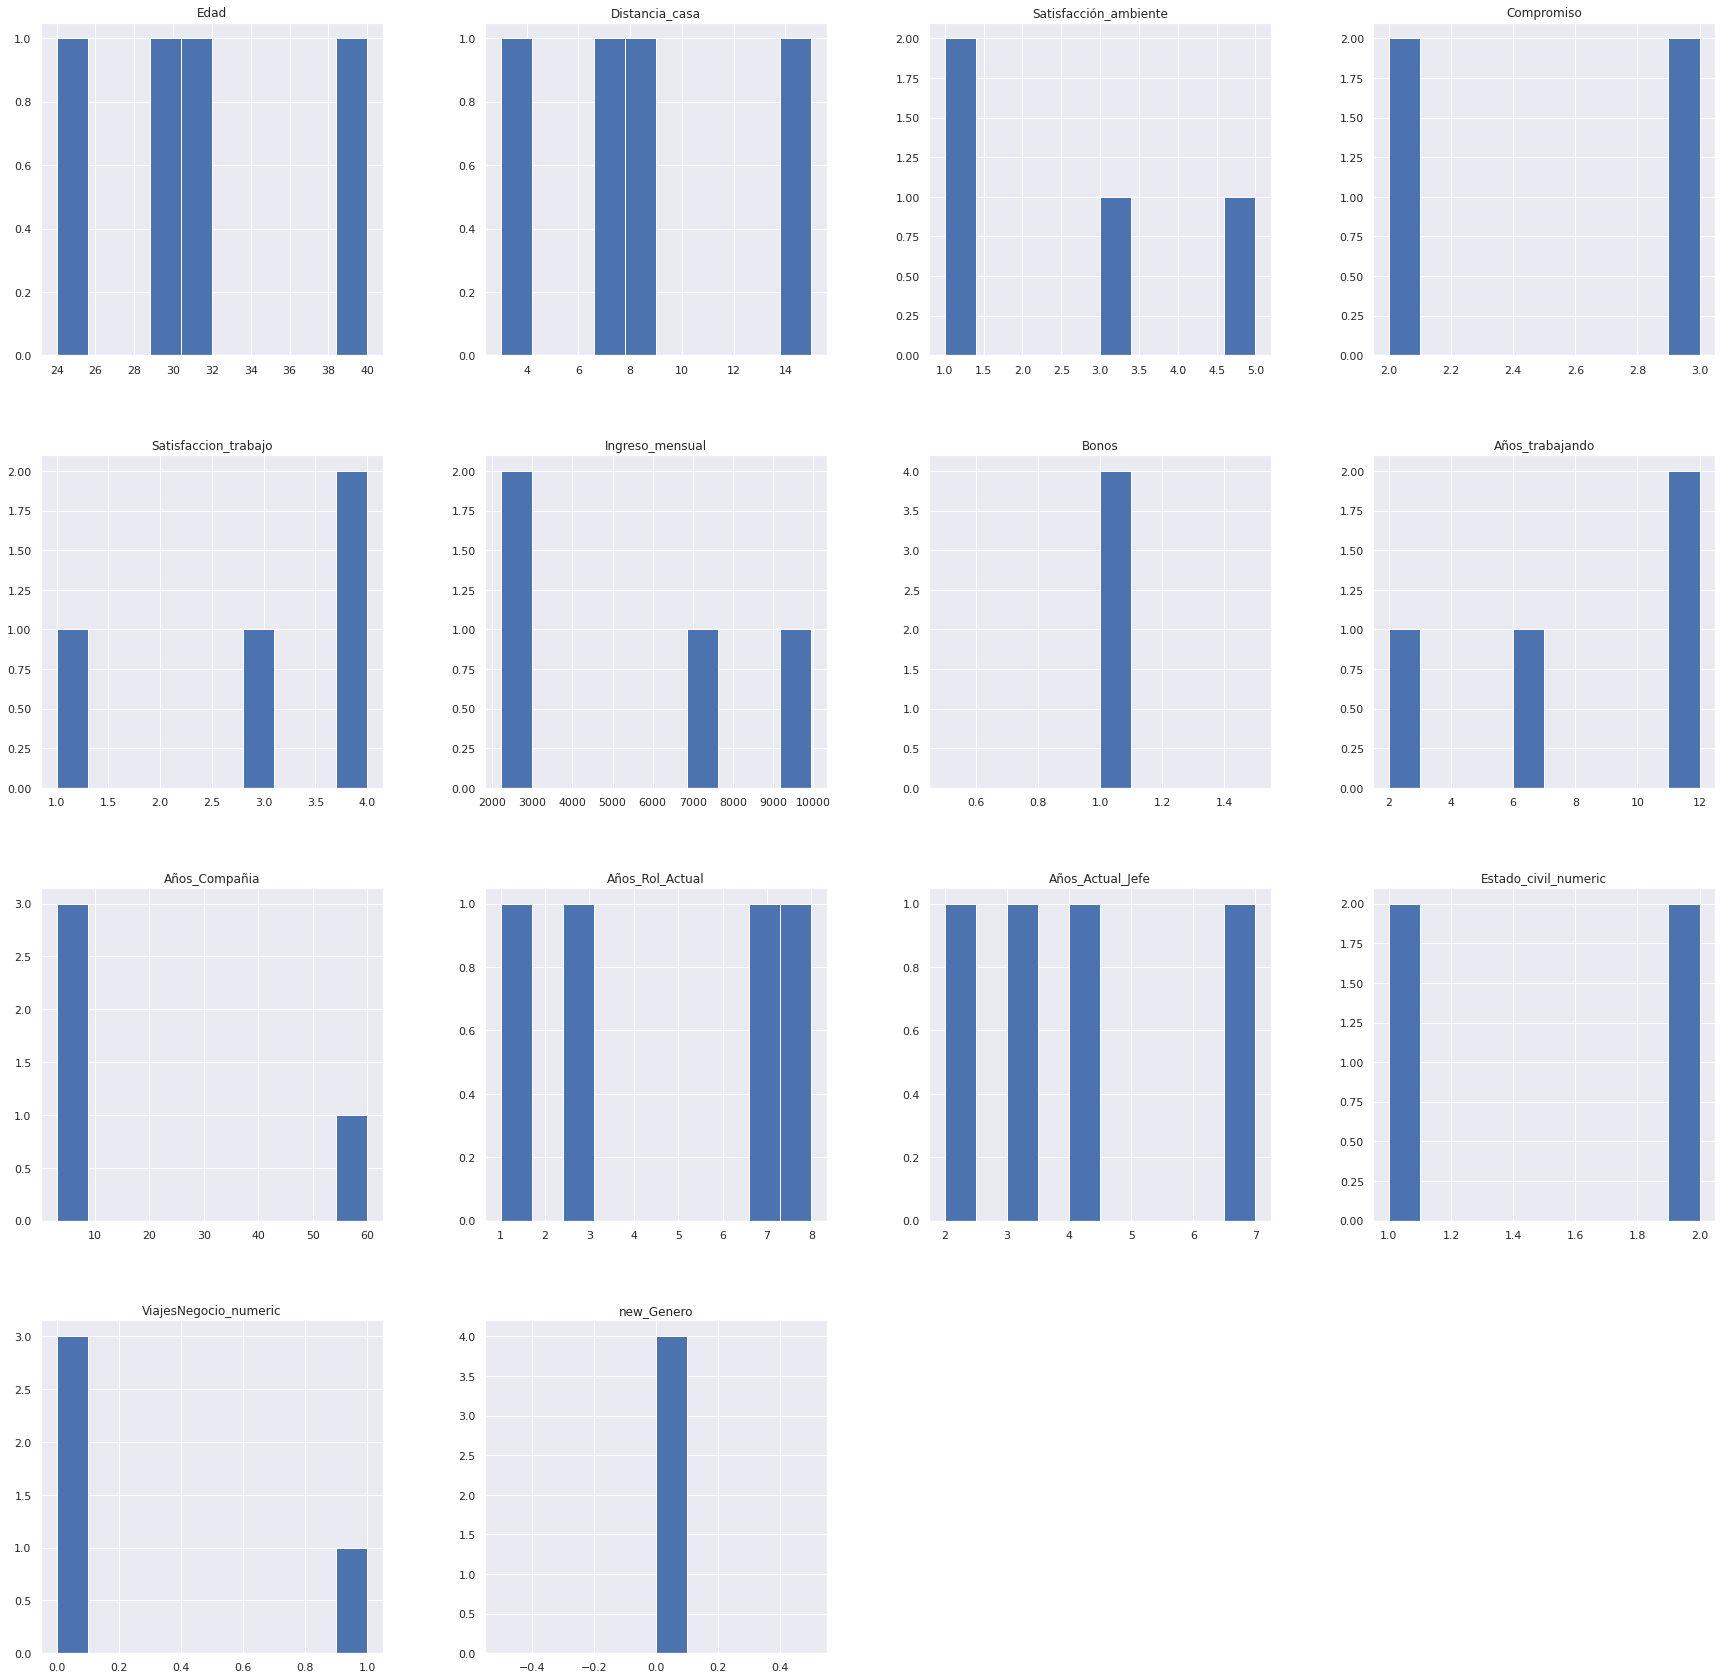

In [ ]:
# Se visualizan los histogramas
datos_t.hist(figsize = (30,30))

####Revisión de correlación

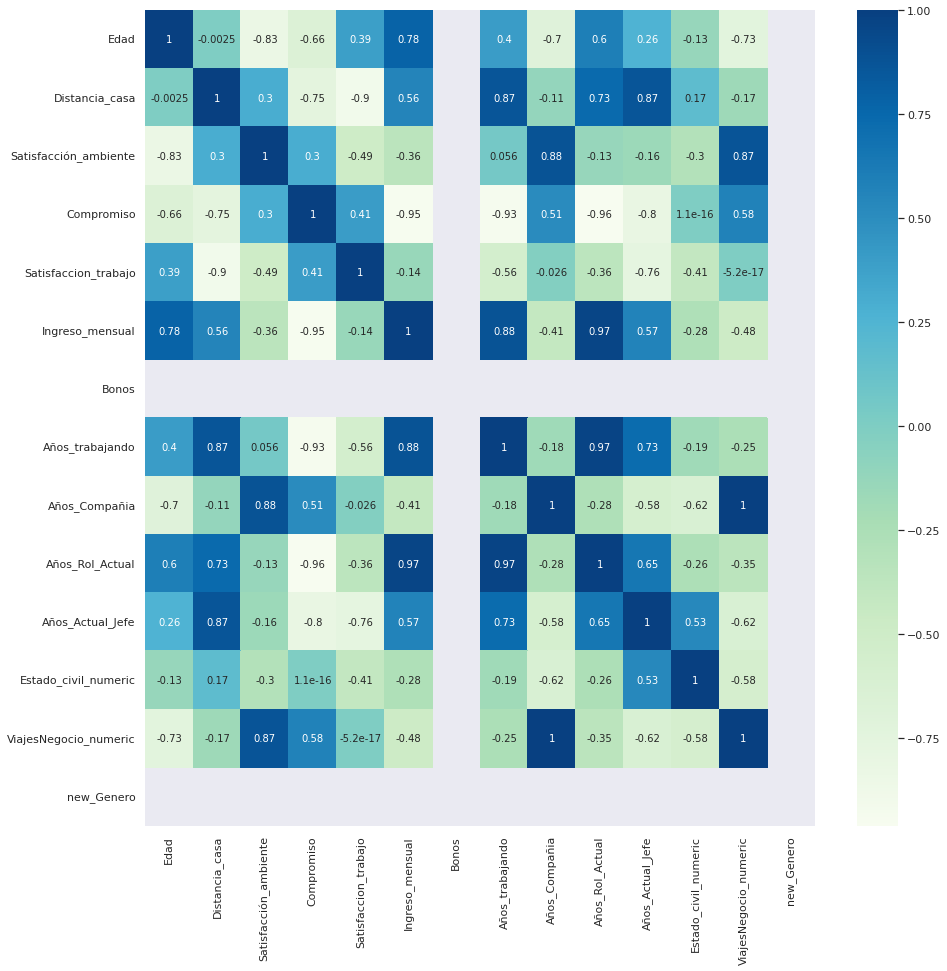

In [ ]:
# ¿Hay correlación entre variables?
plt.figure(figsize =(15,15))
correlacion = datos_t.corr()
sns.heatmap(correlacion, cmap = 'GnBu', annot = True)

##5. Árboles de decisión


###5.1 Sin smote, ni normalización

####5.1.1 Implementación

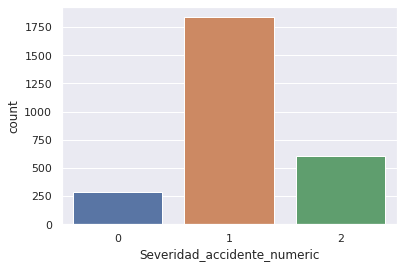

In [ ]:
# vizualizar las proporciones con un diagrama de barras.
ax = sns.countplot(x='Severidad_accidente_numeric', data=datos_t)

Los datos se ven muy desbalanceados, por esta razón será necesario aplicar un algoritmo como SMOTE que permita tener una mejor distribución de estos.

In [ ]:
# Vamos a seleccionar de nuestro conjunto solo los atributos numéricos.
number_cols = datos_t.dtypes[(datos_t.dtypes == np.int64) | (datos_t.dtypes == np.float64)].index 
number_cols = datos_t.select_dtypes(include = ['int64','float']).columns
number_cols

Index(['Numero_vehiculos', 'Numero_victimas', 'Dia_semana', 'Limite_velocidad',
       'Tipo_via_numeric', 'Iluminacion_numeric', 'Clima_numeric',
       'Condicion_via_numeric', 'Tipo_area_numeric',
       'Severidad_accidente_numeric'],
      dtype='object')

In [ ]:
datos_m = datos_t[number_cols]
# Revisión del total de registros
datos_m.shape

(2728, 10)

In [ ]:
# Se selecciona la variable objetivo
Y = datos_m['Severidad_accidente_numeric']
# Del conjunto de datos se elimina la variable target
X = datos_m.drop(['Severidad_accidente_numeric'], axis=1)

In [ ]:
# Probemos normalizando los datos
X_n = X.copy()
X_n=(X_n-X_n.min())/(X_n.max()-X_n.min())

In [ ]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=0)

X_sm, y_sm = sm.fit_resample(X_n, Y)

print(f'''Shape of X before SMOTE: {X_n.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (2728, 9)
Shape of X after SMOTE: (5514, 9)

Balance of positive and negative classes (%):


0    33.333333
2    33.333333
1    33.333333
Name: Severidad_accidente_numeric, dtype: float64

In [ ]:
# Dividir los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 0)


En el caso de los árboles de decisión los hiperparámetros principales que hay que ajustar están relacionados con aquellos que controlan la complejidad, pero también el criterio o medida de pureza puede afectar su rendimiento. En general, estos son:

criterion : {“gini”, “entropy”}, predeterminado = "gini".
La función para medir la calidad de una división. Los criterios admitidos son "gini" y "entropía".

max_depth: int, predeterminado=None.
La profundidad máxima del árbol. Si es None, los nodos se expanden hasta que todas las hojas sean puras o hasta que todas las hojas contengan menos de min_samples_split muestras.

min_samples_split : int or float, predeterminado=2.
El número mínimo de muestras necesarias para dividir un nodo interno.

Se usará le técnica de K-Fold Cross Validation para encontrar los hiperparámetros ideales.

In [ ]:
# Se fija el número de particiones. Se usará K = 10.
particiones = KFold(n_splits = 10, shuffle = True, random_state = 0)

# Se establece el espacio de búsqueda para los hiperparámetros que deseamos ajustar. 
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [4, 6, 8, 10, 20], 'min_samples_split': [2, 3, 4, 5]}

# Definimos el modelo sin ningún valor de estos hiperparámetros
arbol_inicial = DecisionTreeClassifier(random_state = 0)

# Ahora utilizamos GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
mejor_modelo = GridSearchCV(arbol_inicial, param_grid, cv = particiones)

# Ajuste del modelo
mejor_modelo.fit(X_train, Y_train)

# Podemos ver cuál fue el resultado de la búsqueda (mejores valores de hiperparámetros)
mejor_modelo.best_params_

{'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 4}

In [ ]:
# Obtener el mejor modelo.
arbol = mejor_modelo.best_estimator_

####5.1.2 Evaluación

In [ ]:
# Probemos ahora este modelo sobre test.
y_pred_train = arbol.predict(X_train)
y_pred_test = arbol.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.84
Exactitud sobre test: 0.63


Datos de entranamiento
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1471
           1       0.80      0.83      0.82      1480
           2       0.82      0.77      0.80      1460

    accuracy                           0.84      4411
   macro avg       0.84      0.84      0.84      4411
weighted avg       0.84      0.84      0.84      4411



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


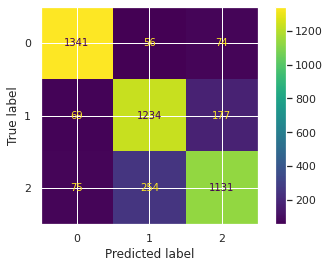

In [ ]:
# Se imprime el informe de rendimiento
print("Datos de entranamiento")
print(classification_report(Y_train, y_pred_train))
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(arbol, X_train, Y_train)  
plt.show()  

Datos de prueba
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       367
           1       0.61      0.65      0.63       358
           2       0.56      0.48      0.52       378

    accuracy                           0.63      1103
   macro avg       0.63      0.63      0.63      1103
weighted avg       0.62      0.63      0.63      1103



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


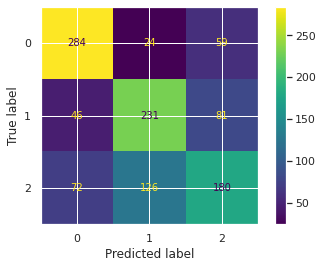

In [ ]:
# Se imprime el informe de rendimiento
print("Datos de prueba")
print(classification_report(Y_test, y_pred_test))
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(arbol, X_test, Y_test)  
plt.show()  

In [ ]:
pd.value_counts(Y)

1    1838
2     605
0     285
Name: Severidad_accidente_numeric, dtype: int64

###5.2 con SMOTE y normalización


Se puede notar que lo resultados obtenidos no son los mejores al estar desbalanceados.  

Entonces SMOTE para balancear los datos y normalizar para  obtener mejores resultados.

SMOTE: Hacer oversampling (aumenta los registros de la clase minoritaria). Coge una fila al azar de la clase minoritaria, miro los más cercanos y hago por ejemplo, un promedio de los valores de ellos. Con eso se garantiza que se crea un nuevo registro que tiene una distribución similar a la de los datos inicialmente escogidos. 

In [ ]:
# Probemos normalizando los datos
X_n = X.copy()
X_n=(X_n-X_n.min())/(X_n.max()-X_n.min())

In [ ]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=0)

X_sm, y_sm = sm.fit_resample(X_n, Y)

print(f'''Shape of X before SMOTE: {X_n.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (2728, 9)
Shape of X after SMOTE: (5514, 9)

Balance of positive and negative classes (%):


0    33.333333
2    33.333333
1    33.333333
Name: Severidad_accidente_numeric, dtype: float64

In [ ]:
#ver la cantidad de datos en cada categoría después de SMOTE
pd.value_counts(y_sm)

0    1838
2    1838
1    1838
Name: Severidad_accidente_numeric, dtype: int64

In [ ]:
# Dividir los datos en entrenamiento y test con SMOTE
X_train, X_test, Y_train, Y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=0)

In [ ]:
# Se fija el número de particiones. Se usará K = 10.
particiones = KFold(n_splits = 10, shuffle = True, random_state = 0)

# Se establece el espacio de búsqueda para los hiperparámetros que deseamos ajustar. 
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [4, 6, 8, 10, 20], 'min_samples_split': [2, 3, 4, 5]}

# Definimos el modelo sin ningún valor de estos hiperparámetros
arbol_inicial = DecisionTreeClassifier(random_state = 0)

# Ahora utilizamos GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
mejor_modelo = GridSearchCV(arbol_inicial, param_grid, cv = particiones)

# Ajuste del modelo
mejor_modelo.fit(X_train, Y_train)

# Podemos ver cuál fue el resultado de la búsqueda (mejores valores de hiperparámetros)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 20],
                         'min_samples_split': [2, 3, 4, 5]})

In [ ]:
# Obtener el mejor modelo.
arbol = mejor_modelo.best_estimator_

In [ ]:
# Probemos ahora este modelo sobre test.
y_pred_train = arbol.predict(X_train)
y_pred_test = arbol.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.84
Exactitud sobre test: 0.63


Datos de entranamiento
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1471
           1       0.80      0.83      0.82      1480
           2       0.82      0.77      0.80      1460

    accuracy                           0.84      4411
   macro avg       0.84      0.84      0.84      4411
weighted avg       0.84      0.84      0.84      4411



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


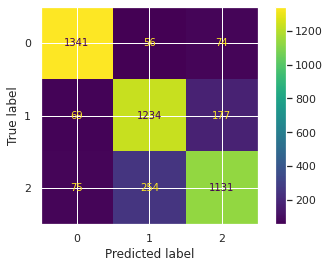

In [ ]:
# Se imprime el informe de rendimiento
print("Datos de entranamiento")
print(classification_report(Y_train, y_pred_train))
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(arbol, X_train, Y_train)  
plt.show()  

Datos de prueba
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       367
           1       0.61      0.65      0.63       358
           2       0.56      0.48      0.52       378

    accuracy                           0.63      1103
   macro avg       0.63      0.63      0.63      1103
weighted avg       0.62      0.63      0.63      1103



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


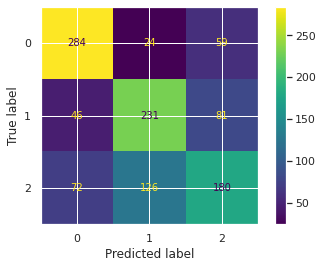

In [ ]:
# Se imprime el informe de rendimiento
print("Datos de prueba")
print(classification_report(Y_test, y_pred_test))
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(arbol, X_test, Y_test)  
plt.show()  


###6. Interpretación


**3.	[15%] Muestre el resultado que arroja la ejecución del algoritmo o algoritmos de machine learning propuestos, con los datos suministrados para la consultoría. Explique cómo el resultado obtenido responde a los objetivos de la organización que lo contrató.**

In [ ]:
# Obtener la importancia de las variables. Mientras mayor el coeficiente, más la importancia.
importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns, "Importancia": arbol.feature_importances_})
importancia_atributo = importancia_atributo.sort_values(by = 'Importancia', ascending = False).reset_index(drop = True)
importancia_atributo

,Atributo,Importancia
0,Dia_semana,0.227515
1,Limite_velocidad,0.157469
2,Numero_vehiculos,0.156052
3,Numero_victimas,0.133995
4,Tipo_via_numeric,0.088430
5,Condicion_via_numeric,0.073243
6,Iluminacion_numeric,0.071363
7,Clima_numeric,0.068468
8,Tipo_area_numeric,0.023464



Esta información es muy útil para el negocio, pues le permite entender qué tan importante es cada atributo al momento de determinar el nivel de gravedad de un accidente.

A continuación se muestran los primeros 3 niveles del árbol para ofrecer una interpretación gráfica del modelo implementado al negocio.

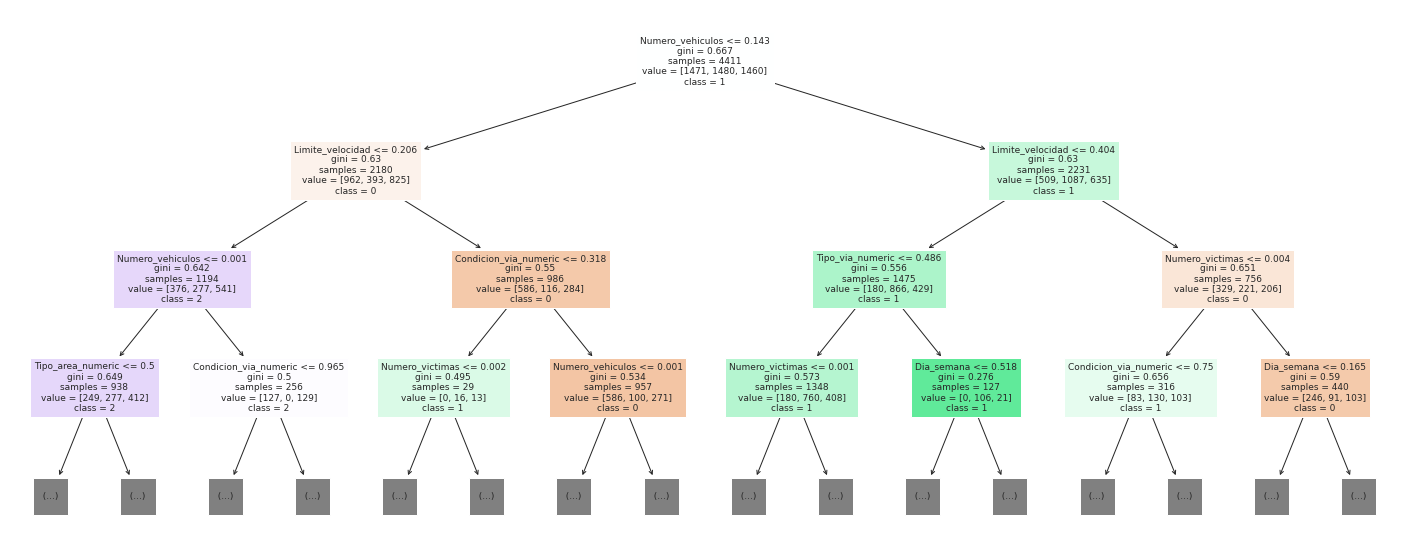

In [ ]:
#Gráfico de los primeros 3 niveles del árbol
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(arbol, max_depth=3, feature_names=X.columns, class_names=["0", "1", "2"], filled=True, fontsize=9)

In [ ]:
# Se calcula la probabilidad de que un dato cualquiera sea puesto en cada categoría
print(arbol.predict_proba(X_test.iloc[[3]]))

[[0.02272727 0.36363636 0.61363636]]


Severidad_accidente
Fatal=0
Leve=1
Serio=2
Por ejemplo, aquí el negocio podría saber que un contexto con las características del dato 3 de prueba tendría un 61.4% de ser categorizado como "Serio", un 36.4% de ser categorizado como "Leve" y un 0.02% de ser categorizado como "Fatal"


###7. Utilidad para el negocio




Se puede concluir que el modelo es de utilidad para el negocio y es funcional para sus requerimientos

El modelo permite concluir sobre la relación entre los factores de influencia asociados a los accidentes de tránsito y la gravedad de cada uno, de modo que puede obtener conocimiento que apoye en el desarrollo de planes de prevención

Como resultados del proyecto, se resalta la importancia que tienen el día de la semana, la condición de la vía, el límite de velocidad y el número de vehículos para determinar la gravedad de los accidentes

El diagrama completo del árbol le permite al negocio entender de forma transparente cómo afecta cada una de las variables, de forma que pueda optimizar sus esfuerzos de prevención de accidentes

El modelo presenta un desempeño bueno (aunque no exelente), que lo podría habilitar para ser usado como herramienta de apoyo en la toma de decisiones del negocio

##5. KNN

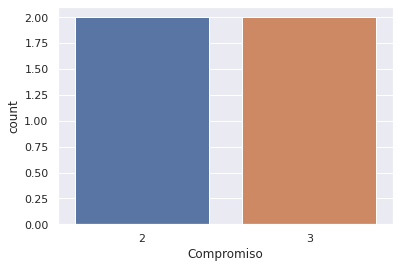

In [ ]:
# vizualizar las proporciones con un diagrama de barras.
ax = sns.countplot(x='Compromiso', data=datos_t)

In [ ]:
# Vamos a seleccionar de nuestro conjunto solo los atributos numéricos.
number_cols = datos_t.dtypes[(datos_t.dtypes == np.int64) | (datos_t.dtypes == np.float64)].index 
number_cols = datos_t.select_dtypes(include = ['int64','float']).columns
number_cols

Index(['Edad', 'Distancia_casa', 'Satisfacción_ambiente', 'Compromiso',
       'Satisfaccion_trabajo', 'Ingreso_mensual', 'Bonos', 'Años_trabajando',
       'Años_Compañia', 'Años_Rol_Actual', 'Años_Actual_Jefe',
       'Estado_civil_numeric', 'ViajesNegocio_numeric', 'new_Genero'],
      dtype='object')

In [ ]:
datos_m = datos_t[number_cols]
# Revisión del total de registros
datos_m.shape

(4, 14)

###5.1 KNN sin SMOTE, ni hiperparámetros

In [ ]:
# Se selecciona la variable objetivo, en este caso "Compromiso".
Y = datos_m['Compromiso']
# Del conjunto de datos se elimina la variable "Compromiso"
X = datos_m.drop(['Compromiso'], axis=1)

# Dividir los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Utilicemos un número de vecinos = 3 
modelo_knn = KNeighborsClassifier(n_neighbors=3)
modelo_knn = modelo_knn.fit(X_train, Y_train)

y_pred_train = modelo_knn.predict(X_train)
y_pred_test = modelo_knn.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.67
Exactitud sobre test: 0.00


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

              precision    recall  f1-score   support

           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



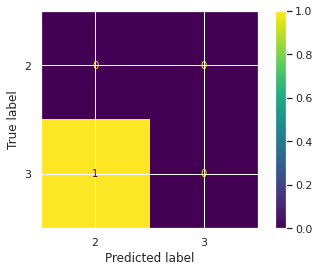

In [ ]:
# Mostrar reporte de clasificación sobre test 
print(classification_report(Y_test, y_pred_test))
# visualizar la matriz de confusión 
plot_confusion_matrix(modelo_knn, X_test, Y_test)  
plt.show()


###5.2 KNN con SMOTE y normalización

Se puede notar que lo resultados obtenidos no son los mejores al estar desbalanceados.

Entonces SMOTE para balancear los datos y normalizar para obtener mejores resultados.

SMOTE: Hacer oversampling (aumenta los registros de la clase minoritaria). Coge una fila al azar de la clase minoritaria, miro los más cercanos y hago por ejemplo, un promedio de los valores de ellos. Con eso se garantiza que se crea un nuevo registro que tiene una distribución similar a la de los datos inicialmente escogidos.

####SMOTE y normalizar

In [ ]:
# Probemos normalizando los datos
X_n = X.copy()
X_n=(X_n-X_n.min())/(X_n.max()-X_n.min())

In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=0)

X_sm, y_sm = sm.fit_resample(X, Y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (4, 13)
Shape of X after SMOTE: (4, 13)

Balance of positive and negative classes (%):


3    50.0
2    50.0
Name: Compromiso, dtype: float64

In [ ]:
#ver la cantidad de datos en cada categoría después de SMOTE
pd.value_counts(y_sm)

3    2
2    2
Name: Compromiso, dtype: int64

####Construcción del modelo

In [ ]:
# Dividir los datos en entrenamiento y test con SMOTE
X_train, X_test, Y_train, Y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=0)

# Utilicemos un número de vecinos = 3
modelo_knn = KNeighborsClassifier(n_neighbors=3)
modelo_knn = modelo_knn.fit(X_train, Y_train)

y_pred_train = modelo_knn.predict(X_train)
y_pred_test = modelo_knn.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.67
Exactitud sobre test: 0.00


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

              precision    recall  f1-score   support

           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



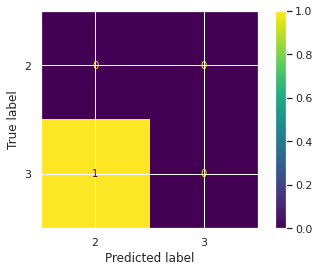

In [ ]:
# Mostrar reporte de clasificación sobre test SMOTE
print(classification_report(Y_test, y_pred_test))
# visualizar la matriz de confusión CON SMOTE
plot_confusion_matrix(modelo_knn, X_test, Y_test)  
plt.show()


###5.3 KNN con SMOTE y con búsqueda de hiperparámetros

In [ ]:
# Primero definamos el espacio de búsqueda
n_vecinos =  list(range(1,11))
# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=2, shuffle=True, random_state = 0) '''#Importante cambiar el n_splits cuando se tengan más datos'''

In [ ]:
param_grid = {'n_neighbors': n_vecinos, 'p': [1, 2]} #1 Manhattan, 2 euclidiana

In [ ]:
clasificadorKNN = KNeighborsClassifier()
modelo_Knn = GridSearchCV(clasificadorKNN, param_grid, cv=particiones)
modelo_Knn.fit(X_train,Y_train) 
print("Mejor parámetro: {}".format(modelo_Knn.best_params_)) 
print("Mejor cross-validation score: {:.2f}".format(modelo_Knn.best_score_))

In [ ]:
# Obtener el mejor modelo.
modelo_final = modelo_Knn.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred_train = modelo_final.predict(X_train)
y_pred_test = modelo_final.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 1.00
Exactitud sobre test: 1.00


              precision    recall  f1-score   support

           3       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


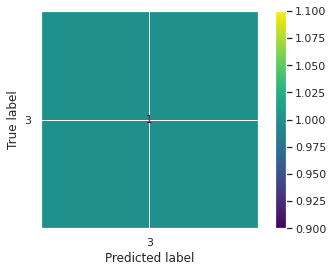

In [ ]:
# Mostrar reporte de clasificación sobre test SMOTE
print(classification_report(Y_test, y_pred_test))
# visualizar la matriz de confusión CON SMOTE
plot_confusion_matrix(modelo_Knn, X_test, Y_test)  
plt.show()


##5. Kmeans

###Revisar correlación

In [ ]:
# Vamos a seleccionar de nuestro conjunto solo los atributos numéricos.
number_cols = datos_t.dtypes[(datos_t.dtypes == np.int64) | (datos_t.dtypes == np.float64)].index 
number_cols = datos_t.select_dtypes(include = ['int64','float']).columns
number_cols

Index(['Edad', 'Distancia_casa', 'Satisfacción_ambiente', 'Compromiso',
       'Satisfaccion_trabajo', 'Ingreso_mensual', 'Bonos', 'Años_trabajando',
       'Años_Compañia', 'Años_Rol_Actual', 'Años_Actual_Jefe',
       'Estado_civil_numeric', 'ViajesNegocio_numeric', 'new_Genero'],
      dtype='object')

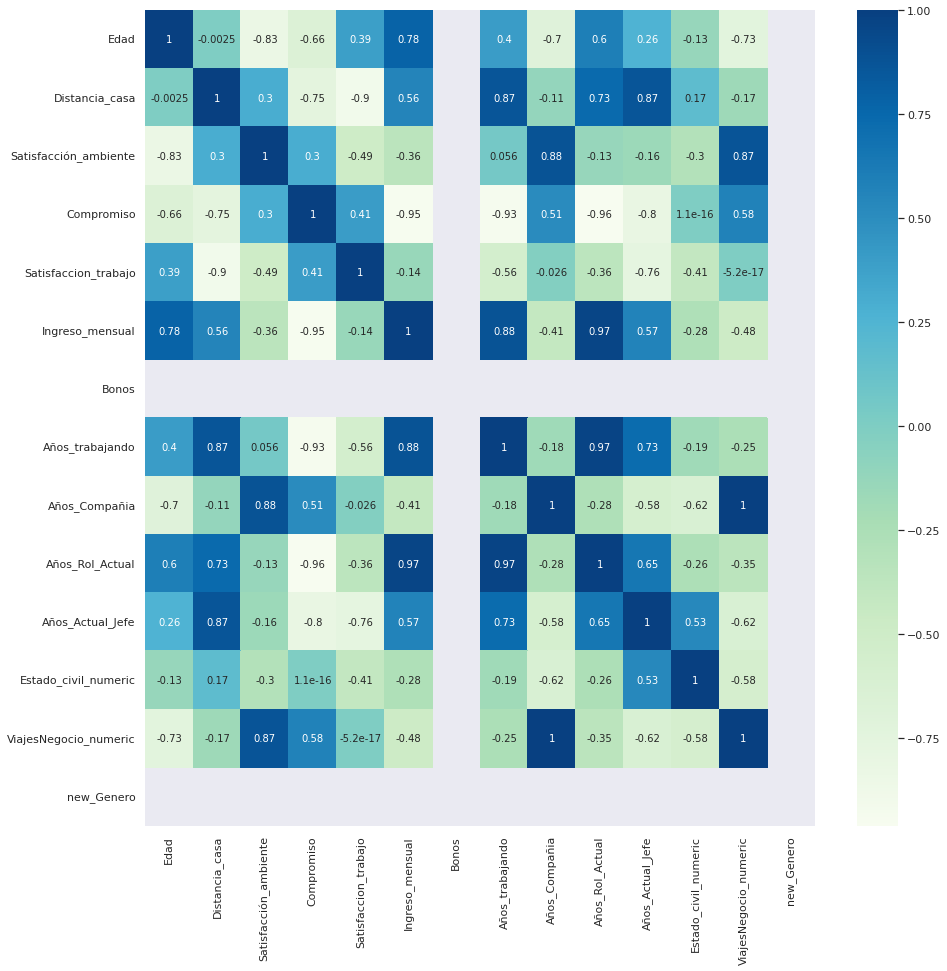

In [ ]:
# ¿Hay correlación entre variables?
plt.figure(figsize =(15,15))
correlacion = datos_t.corr()
sns.heatmap(correlacion, cmap = 'GnBu', annot = True)

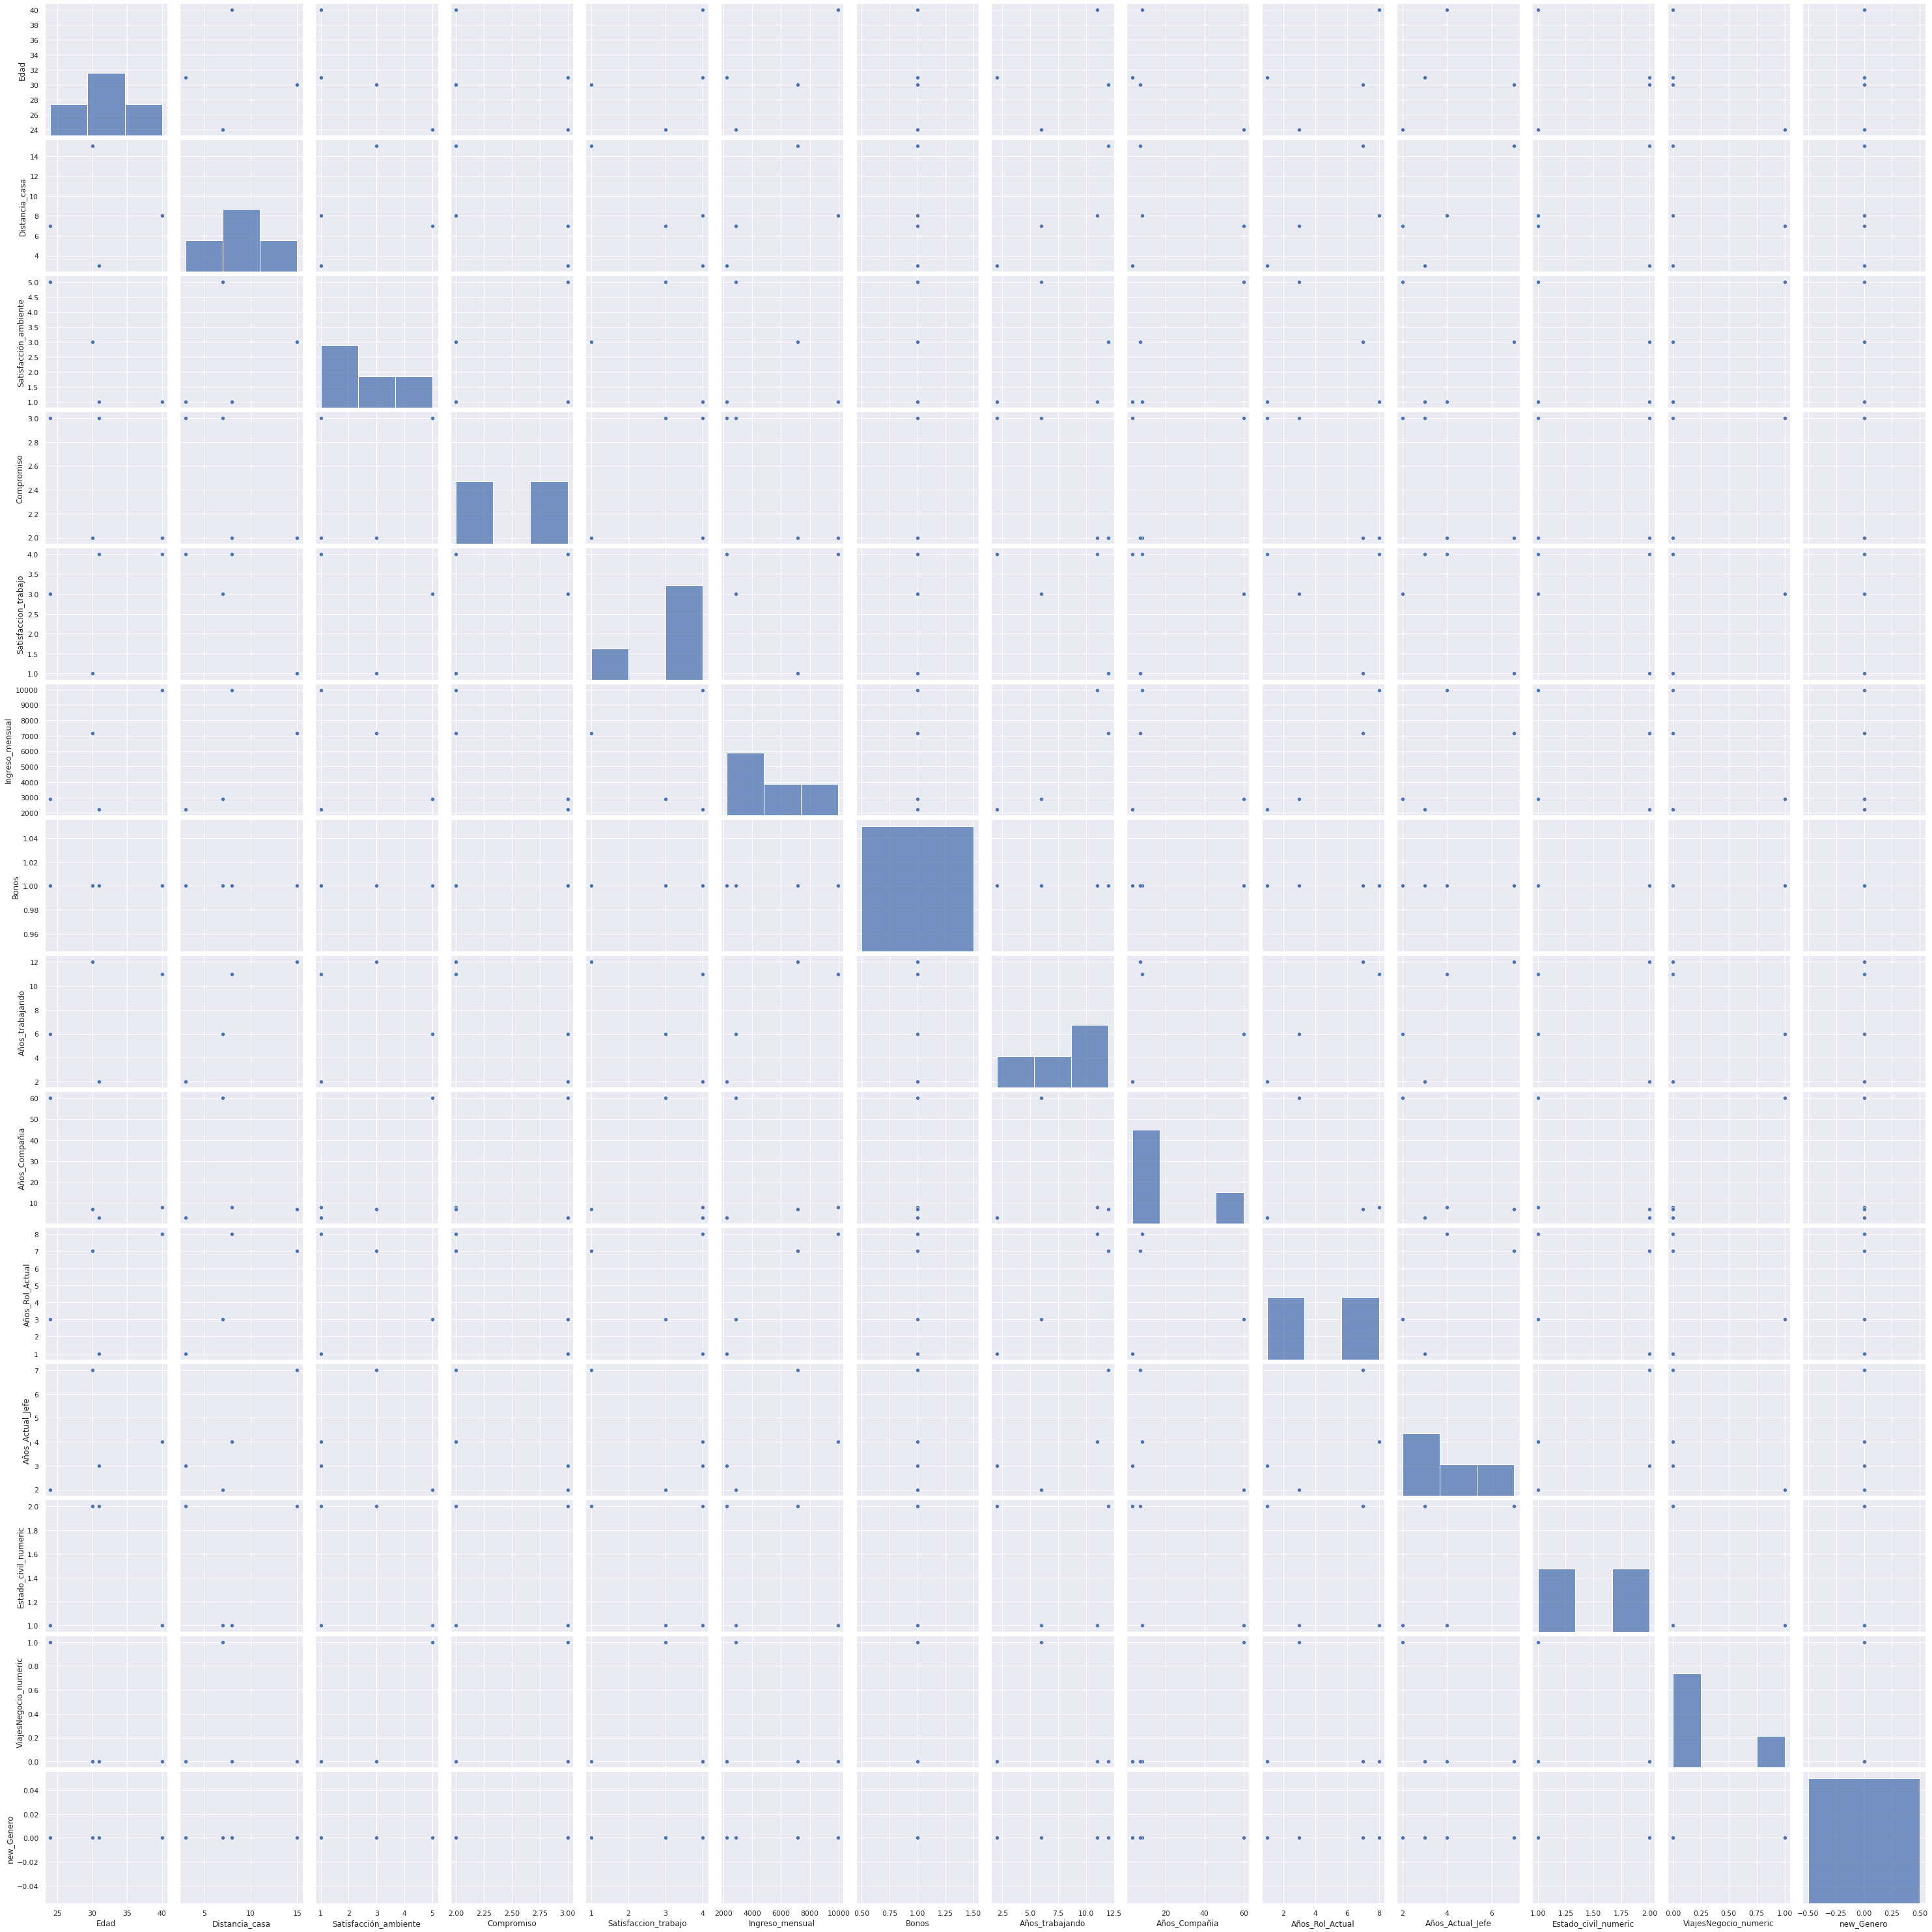

In [ ]:
# Ver si hay grupos naturales en los datos
sns.pairplot(datos_t, height=3,vars=['Edad', 'Distancia_casa', 'Satisfacción_ambiente', 'Compromiso',
       'Satisfaccion_trabajo', 'Ingreso_mensual', 'Bonos', 'Años_trabajando',
       'Años_Compañia', 'Años_Rol_Actual', 'Años_Actual_Jefe',
       'Estado_civil_numeric', 'ViajesNegocio_numeric', 'new_Genero' ],kind='scatter')     

###Construcción del moodelo

####Dos variables

#####Selección de variables y modelo

In [ ]:
selected_cols = ['Años_Rol_Actual','Ingreso_mensual']

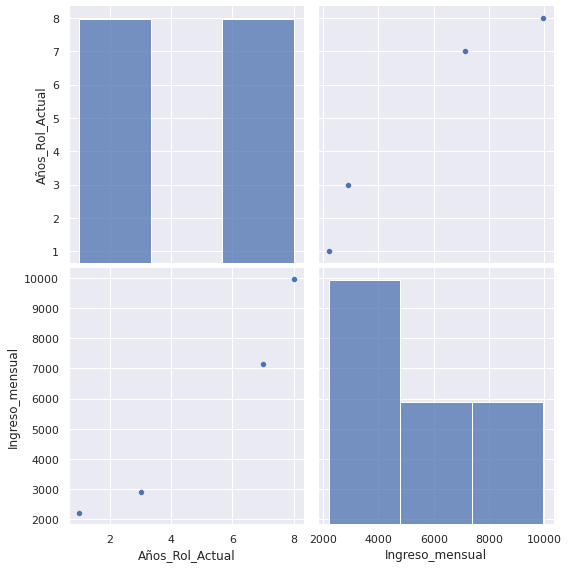

In [ ]:
sns.pairplot(datos_t, height=4,vars=selected_cols,kind='scatter')

In [ ]:
# El negocio quiere que empecemos con calma, así que nos sugiere un clustering para obtener dos segmentos.
kmeans = KMeans(n_clusters=2, random_state=0) #Importante elegir el número de clusters
datos_k=datos_t[selected_cols]
kmeans = kmeans.fit(datos_k)

In [ ]:
#Transformar arreglo el dataframe que trabajamos para aplicar funciones más adelante.
cols_number = datos_k.to_numpy()
cols_number

array([[   1, 2211],
       [   8, 9958],
       [   3, 2886],
       [   7, 7140]])

In [ ]:
#Consultar el los labels del clúster asignado a cada fila 
kmeans.labels_

array([0, 1, 0, 1], dtype=int32)

#####Ver resultados

,Edad,Distancia_casa,Satisfacción_ambiente,Compromiso,Satisfaccion_trabajo,Ingreso_mensual,Bonos,Años_trabajando,Años_Compañia,Años_Rol_Actual,Años_Actual_Jefe,Estado_civil_numeric,ViajesNegocio_numeric,new_Genero
Cluster,,,,,,,,,,,,,,
0,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,2,2,2,2,2,2,2,2,2,2,2,2,2,2


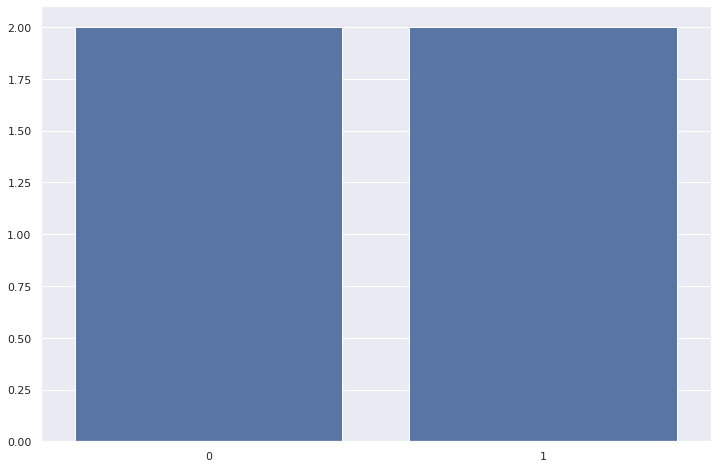

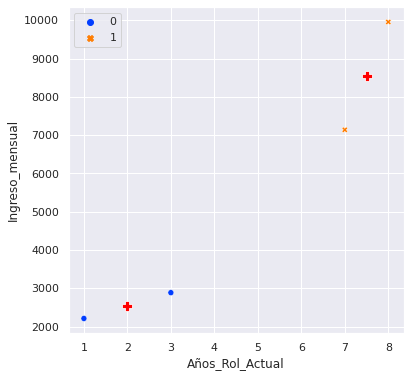

In [ ]:
# Revisar la cantidad de registros en los clústeres resultado
labels = kmeans.labels_
datos_t['Cluster'] = labels

cluster_distrib = datos_t['Cluster'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b');



# Ver gráficamente los elementos de los diferentes clúster
fig = plt.figure(figsize=(6,6))
ax = sns.scatterplot(data = datos_t, 
                     x = selected_cols[0],
                     y = selected_cols[1], 
                     hue = kmeans.labels_, 
                     style = kmeans.labels_,
                     palette = 'bright')

sns.scatterplot(x = kmeans.cluster_centers_[:,0], 
                y = kmeans.cluster_centers_[:,1], 
                color = 'red',
                s = 100,
                marker = 'P',                
                ax = ax)

# Revisar el número exacto de elementos por clúster y las variables utilizadas.
datos_t.groupby('Cluster').count()

In [ ]:
# Revisemos los valores de los centroides de los clústeres generados
print('Centroides: [[','Años_Rol_Actual', ' ' , 'Ingreso_Mensual', ']]', kmeans.cluster_centers_)

Centroides: [[ Años_Rol_Actual   Ingreso_Mensual ]] [[2.0000e+00 2.5485e+03]
 [7.5000e+00 8.5490e+03]]


##### Evaluar la calidad de los clústeres obtenidos

In [ ]:
#Creamos una función basada en el concepto de silueta
def plot_silhouette(data, 
                    labels,
                   ylabel = 'Clústeres',
                   xlabel = "Silhouette coefficient",
                   title = 'Silhouette Plot'):
    '''
    Graficar la silueta de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    labels : np.array
        El arreglo con las etiquetas correspondientes
    ylabel  string
        La etiqueta del eje y
    xlabel : string
        La etiqueta del eje x
    title : string
        El titulo de la gráfica        
    '''
    cluster_labels = np.unique(labels)
    print(cluster_labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                        labels,
                                        metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                        c_silhouette_vals,
                        height=1.0,
                        edgecolor='none',
                        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

[0 1]


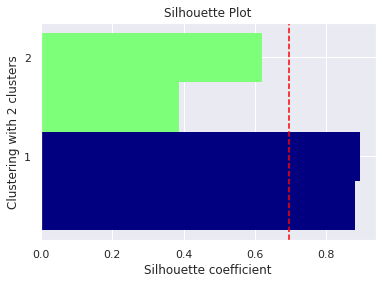

In [ ]:
# Esta función puede tardar varios minutos
plot_silhouette(data = datos_t, 
                labels = kmeans.labels_, 
                ylabel = 'Clustering with 2 clusters')

####Tres variables y datos normalizados

######Selección variables

In [ ]:
selected_cols = ['Años_Rol_Actual','Ingreso_mensual','Años_trabajando']

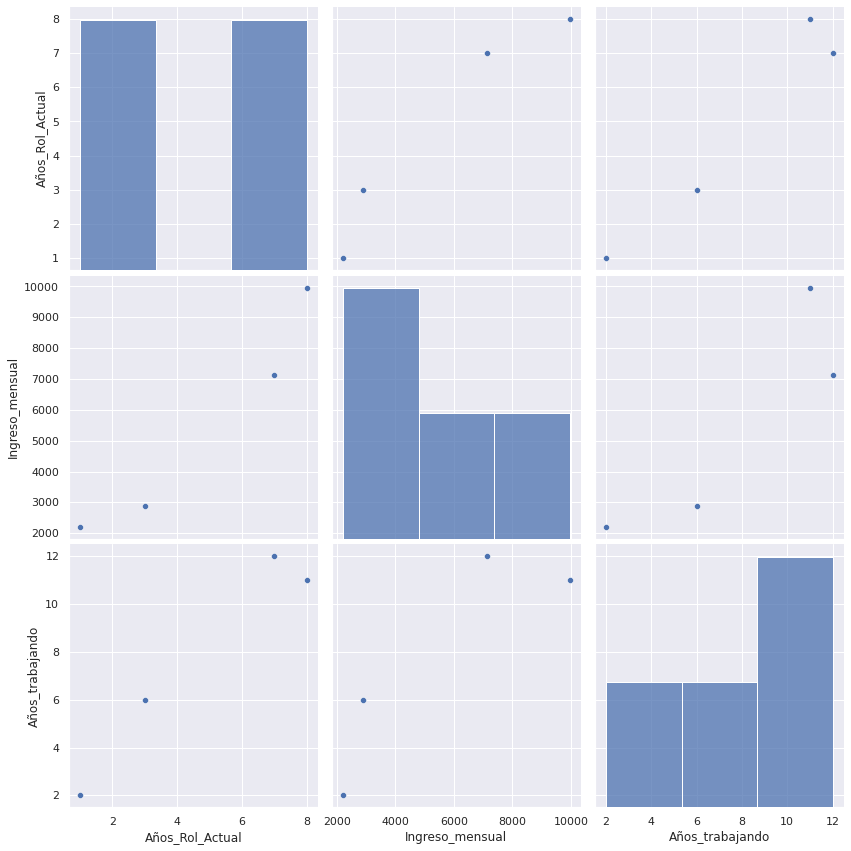

In [ ]:
sns.pairplot(datos_t, height=4,vars=selected_cols,kind='scatter')

######Normalización

In [ ]:
from numpy import asarray

#MinMaxScaler
mms = MinMaxScaler()
#StandardScaler
#mms = StandardScaler()

datos_t_norm = mms.fit_transform(datos_t.copy())
saved_cols = datos_t.columns

datos_t_norm = pd.DataFrame(datos_t_norm, columns =saved_cols)

In [ ]:
# Mirar  los estadísticos y revisar el resultado de la normalización
datos_t_norm.describe()

,Edad,Distancia_casa,Satisfacción_ambiente,Compromiso,Satisfaccion_trabajo,Ingreso_mensual,Bonos,Años_trabajando,Años_Compañia,Años_Rol_Actual,Años_Actual_Jefe,Estado_civil_numeric,ViajesNegocio_numeric,new_Genero,Cluster
count,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.0,4.000000,4.000000,4.000000,4.000000,4.00000,4.00,4.0,4.00000
mean,0.453125,0.437500,0.375000,0.50000,0.666667,0.430844,0.0,0.575000,0.289474,0.535714,0.400000,0.50000,0.25,0.0,0.50000
std,0.412610,0.415972,0.478714,0.57735,0.471405,0.472544,0.0,0.464579,0.475198,0.472005,0.432049,0.57735,0.50,0.0,0.57735
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00,0.0,0.00000
25%,0.281250,0.250000,0.000000,0.00000,0.500000,0.065348,0.0,0.300000,0.052632,0.214286,0.150000,0.00000,0.00,0.0,0.00000
50%,0.406250,0.375000,0.250000,0.50000,0.833333,0.361688,0.0,0.650000,0.078947,0.571429,0.300000,0.50000,0.00,0.0,0.50000
75%,0.578125,0.562500,0.625000,1.00000,1.000000,0.727185,0.0,0.925000,0.315789,0.892857,0.550000,1.00000,0.25,0.0,1.00000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.00000,1.00,0.0,1.00000


##### Encontrar el número óptimo de clústeres utilizando el método del codo

In [ ]:
def plot_distortion(data,
                    k_min=1, 
                    k_max=11,
                    ylabel = 'Distortion',
                    xlabel = 'Number of clusters',
                    title = 'Distortion Plot'):
    '''
    Graficar el codo de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    xlabel : string
        La etiqueta del eje x
    ylabel  string
        La etiqueta del eje y    
    title : string
        El titulo de la gráfica  
    '''
    distortions = []
    for i in range(k_min, k_max):
        km = KMeans(n_clusters=i,
                 init='k-means++',
                 n_init=10,
                 max_iter=300,
                 random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)
    plt.plot(range(k_min,k_max), distortions, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

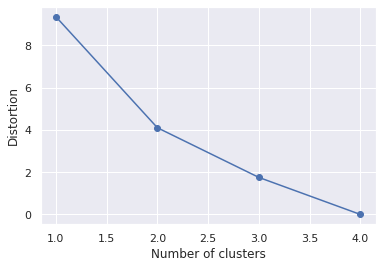

In [ ]:
plot_distortion(datos_t_norm,1,5)#En lugar de 5 debería ir 11

#####Construir el nuevo modelo con el número de clústeres obtenido

In [ ]:
kmeans2 = KMeans(n_clusters=3, random_state=0) 
kmeans2 = kmeans.fit(datos_t_norm[selected_cols])

#####Visualizar el resultado

,Edad,Distancia_casa,Satisfacción_ambiente,Compromiso,Satisfaccion_trabajo,Ingreso_mensual,Bonos,Años_trabajando,Años_Compañia,Años_Rol_Actual,Años_Actual_Jefe,Estado_civil_numeric,ViajesNegocio_numeric,new_Genero
Cluster,,,,,,,,,,,,,,
0,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,2,2,2,2,2,2,2,2,2,2,2,2,2,2


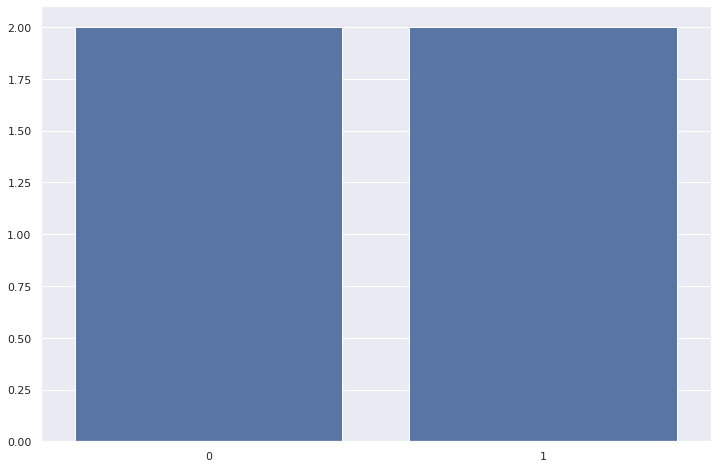

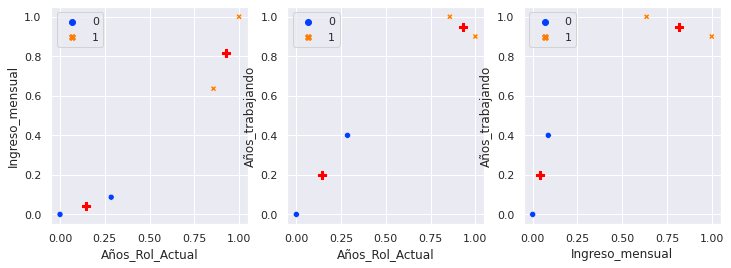

In [ ]:
# Revisar la cantidad de registros en los clústeres resultado
labels = kmeans.labels_
datos_t_norm['Cluster'] = labels

cluster_distrib = datos_t_norm['Cluster'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b');

#Ver gráficamente los componentes de cada cluster
fig, axes = plt.subplots(1, 3, figsize = (12,4))

ax = axes[0]
sns.scatterplot(data = datos_t_norm, x = selected_cols[0],y = selected_cols[1], 
                 hue = kmeans2.labels_, style = kmeans2.labels_, palette = 'bright', ax = ax)

sns.scatterplot(x = kmeans.cluster_centers_[:,0], 
                y = kmeans.cluster_centers_[:,1], 
                color = 'red',
                s = 100,
                marker = 'P',                
                ax = ax)


ax = axes[1]
sns.scatterplot(data = datos_t_norm, x = selected_cols[0],y = selected_cols[2], 
                 hue = kmeans2.labels_, style = kmeans2.labels_, palette = 'bright', ax = ax)

sns.scatterplot(x = kmeans.cluster_centers_[:,0], 
                y = kmeans.cluster_centers_[:,2], 
                color = 'red',
                s = 100,
                marker = 'P',                
                ax = ax)

ax = axes[2]
sns.scatterplot(data = datos_t_norm, x = selected_cols[1],y = selected_cols[2], 
                 hue = kmeans2.labels_, style = kmeans2.labels_, palette = 'bright', ax = ax)

sns.scatterplot(x = kmeans.cluster_centers_[:,1], 
                y = kmeans.cluster_centers_[:,2], 
                color = 'red',
                s = 100,
                marker = 'P',                
                ax = ax)


# Revisar el número exacto de elementos por clúster y las variables utilizadas.
datos_t_norm.groupby('Cluster').count()

In [ ]:
# Revisemos los valores de los centroides de los clústeres generados
print('Centroides: [[','Años_Rol_Actual', ' ' , 'Ingreso_mensual', '','Años_Trabajando'']]', kmeans2.cluster_centers_)

Centroides: [[ Años_Rol_Actual   Ingreso_mensual  Años_Trabajando]] [[0.14285714 0.04356525 0.2       ]
 [0.92857143 0.81812314 0.95      ]]


#####Evaluar calidad de clústeres obtenidos

In [ ]:
#Creamos una función basada en el concepto de silueta
def plot_silhouette(data, 
                    labels,
                   ylabel = 'Clústeres',
                   xlabel = "Silhouette coefficient",
                   title = 'Silhouette Plot'):
    '''
    Graficar la silueta de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    labels : np.array
        El arreglo con las etiquetas correspondientes
    ylabel  string
        La etiqueta del eje y
    xlabel : string
        La etiqueta del eje x
    title : string
        El titulo de la gráfica        
    '''
    cluster_labels = np.unique(labels)
    print(cluster_labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                        labels,
                                        metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                        c_silhouette_vals,
                        height=1.0,
                        edgecolor='none',
                        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

[0 1]


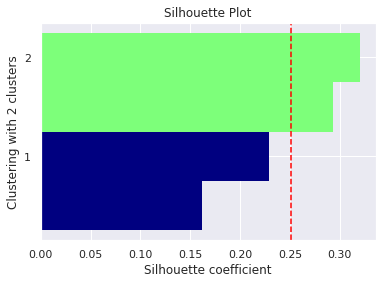

In [ ]:
n_clusters = 2
km = KMeans(n_clusters=n_clusters, random_state=0)
km.fit(datos_t_norm)
plot_silhouette(data = datos_t_norm, 
                labels = km.labels_, 
                ylabel = f'Clustering with {n_clusters} clusters')

[0 1]


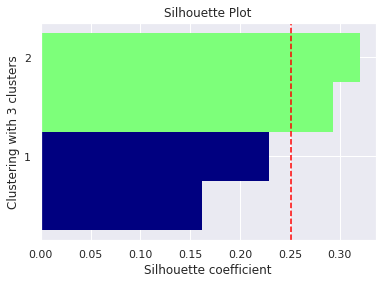

In [ ]:
# Esta función puede tardar varios minutos
plot_silhouette(data = datos_t_norm, 
                labels = kmeans2.labels_, 
                ylabel = 'Clustering with 3 clusters')

In [ ]:
n_clusters = 4
km = KMeans(n_clusters=n_clusters, random_state=0)
km.fit(datos_t_norm)
plot_silhouette(data = datos_t_norm, 
                labels = km.labels_, 
                ylabel = f'Clustering with {n_clusters} clusters')

###Análisis y conclusiones

Dado que el mejor número de cluster es 3, se procede con esta cantidad

In [ ]:
n_clusters = 3
km = KMeans(n_clusters=n_clusters, random_state=0)
km.fit(datos_t_norm)

KMeans(n_clusters=3, random_state=0)

In [ ]:
# Crea los prototipos
df_pro = pd.DataFrame(np.transpose(km.cluster_centers_), columns = range(1, n_clusters +1))
df_pro['column'] = datos_t.columns
df_pro=df_pro[:14]
df_pro

,1,2,3,column
0,0.4375,0.687500,0.000000,Edad
1,0.0000,0.708333,0.333333,Distancia_casa
2,0.0000,0.250000,1.000000,Satisfacción_ambiente
3,1.0000,0.000000,1.000000,Compromiso
4,1.0000,0.500000,0.666667,Satisfaccion_trabajo
5,0.0000,0.818123,0.087131,Ingreso_mensual
6,0.0000,0.000000,0.000000,Bonos
7,0.0000,0.950000,0.400000,Años_trabajando
8,0.0000,0.078947,1.000000,Años_Compañia
9,0.0000,0.928571,0.285714,Años_Rol_Actual


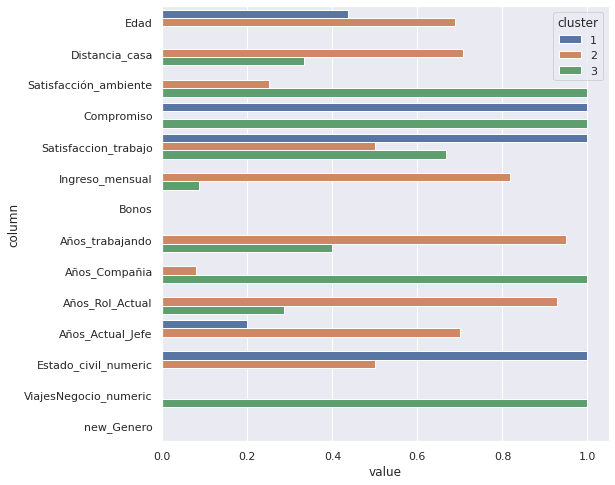

In [ ]:
resp = []
for i in range(1, n_clusters+1 ):
    df1 = df_pro[['column',i]].rename(columns = {i:'value'})
    df1['cluster'] = i
    resp.append(df1)

df_plot = pd.concat(resp, ignore_index = True)


fig = plt.figure(figsize=(8,8))
sns.barplot(data = df_plot, y = 'column', x = 'value', hue = 'cluster', orient = 'h')

##5. Regresión

In [ ]:
# Se selecciona la variable objetivo, en este caso "precio".
Y=datos_t['Ingreso_mensual']
# Del conjunto de datos se elimina la variable "precio".
X=datos_t.drop(['Ingreso_mensual'], axis=1)

In [ ]:
# Mostramos nuestros datos
X.head()

,Edad,Distancia_casa,Satisfacción_ambiente,Compromiso,Satisfaccion_trabajo,Bonos,Años_trabajando,Años_Compañia,Años_Rol_Actual,Años_Actual_Jefe,Estado_civil_numeric,ViajesNegocio_numeric,new_Genero
0,31,3,1,3,4,1,2,3,1,3,2,0,0
1,40,8,1,2,4,1,11,8,8,4,1,0,0
2,24,7,5,3,3,1,6,60,3,2,1,1,0
5,30,15,3,2,1,1,12,7,7,7,2,0,0


In [ ]:
Y.head()

0    2211
1    9958
2    2886
5    7140
Name: Ingreso_mensual, dtype: int64

In [ ]:
# Se realiza la división entrenamiento - test. Se deja 20% de los datos para el test.
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=0)

Crear un objeto de la clase LinearRegression

In [ ]:
# Primero se crea el objeto para construir el modelo
modelo_regresion = LinearRegression()
# Podemos verificar que lo hemos construido.
modelo_regresion

LinearRegression()

Entrenar el modelo utilizando el conjunto de entrenamiento.

In [ ]:
# Ajustar el modelo con los datos de entrenamiento
modelo_regresion.fit(X_train,Y_train)

LinearRegression()

###6. Evaluación del modelo

Las métricas de evaluación nos van a permitir determinar qué tan bien se desempeña un modelo; es decir, cómo se ajusta a los datos. En esta sección se utilizan las siguientes métricas

1. Mean-Squared-Error(MSE). Error medio cuadrático
2. Mean-Absolute-Error(MAE). Error absoluto medio
3. R² or Coeficiente de determinación.

In [ ]:
# Se obtienen las predicciones del modelo sobre el conjunto de entrenamiento.
y_pred = modelo_regresion.predict(X_train)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("MSE: %.2f" % mean_squared_error(Y_train, y_pred, squared=False))
print("MAE: %.2f" % mean_absolute_error(Y_train, y_pred))
print('R²: %.2f' % r2_score(Y_train, y_pred))

MSE: 0.00
MAE: 0.00
R²: 1.00


In [ ]:
# Se obtienen las predicciones del modelo sobre el conjunto test.
y_pred = modelo_regresion.predict(X_test)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("MSE: %.2f" % mean_squared_error(Y_test, y_pred, squared=False))
print("MAE: %.2f" % mean_absolute_error(Y_test, y_pred))
print('R²: %.2f' % r2_score(Y_test, y_pred))

MSE: 5787.54
MAE: 5787.54
R²: nan


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


#### Tomar todos los datos y construir el modelo final.

In [ ]:
# Ajustar el modelo con los datos de entrenamiento
modelo_regresion.fit(X,Y)

LinearRegression()

In [ ]:
# Podemos visualizar los parámetros del modelos (coeficientes de regresión)
modelo_regresion.coef_

array([349.72347163, 105.61812058, -20.70653051, -30.81994127,
        19.06416025,   0.        , 262.22795195,  22.90447262,
       216.49634572,  16.55403522, -33.97582522,  -2.3991271 ,
         0.        ])

In [ ]:
# importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns,"Importancia": importancia})
importancia = modelo_regresion.coef_
importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,Edad,349.723472
1,Años_trabajando,262.227952
2,Años_Rol_Actual,216.496346
3,Distancia_casa,105.618121
4,Años_Compañia,22.904473
5,Satisfaccion_trabajo,19.064160
6,Años_Actual_Jefe,16.554035
7,Bonos,0.000000
8,new_Genero,0.000000
9,ViajesNegocio_numeric,-2.399127


###7. Interpretación del modelo

Otro aspecto que debemos tener en cuenta es la significancia estadística de los coeficientes. Para determinarla, se aplica la prueba t de Student o t-test, con las siguientes hipótesis sobre los coeficientes:

H0: wi = 0, es decir, no hay una relación lineal entre la variable dependiente y la independiente.

Ha: wi ≠ 0, es decir, sí existe una relación lineal entre ambas variables.

El p-valor (en inglés p-value) del coeficiente verifica entonces la hipótesis nula de la siguiente forma: Si el p-valor es menor o igual que el nivel de significancia seleccionado, entonces se puede afirmar que los datos suministran suficiente evidencia para rechazar la hipótesis nula. Es decir, cambios en la variable independiente estarán asociados con cambios en la variable dependiente y esta relación es estadísticamente significativa, por lo que la variable independiente será importante para el modelo de regresión. Si el p-valor es mayor que el nivel de significancia, entonces no hay suficiente evidencia en los datos para rechazar la hipótesis nula y concluir que w1 es significativamente diferente de 0.

Por otra parte, el valor de un coeficiente determina cuánto aumenta o se reduce el valor promedio de la variable dependiente cuando la independiente cambia por una unidad. El signo del coeficiente indica si la relación es positiva o negativa.

Podemos sacar un reporte que nos va a permitir analizar estadísticos del modelo.

**La idea es que el p sea menor al t, para decir que se rechaza la hipótesis nula, por lo que sí habría relación lineal que inflye en que lavariable dependiente cambia de acuerdo a la independiente**

In [ ]:
# Ajustar el modelo para ver el reporte
model = sm.OLS(Y, X).fit() ## sm.OLS(output, input)
# Mostrar las estadísticas del modelo
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/usr/local/lib/python3.7/dist-packa

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Ingreso_mensual   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Sat, 12 Mar 2022   Prob (F-statistic):                nan
Time:                        16:52:35   Log-Likelihood:                 99.392
No. Observations:                   4   AIC:                            -190.8
Df Residuals:                       0   BIC:                            -193.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Edad                     87.7996        inf          0        nan         nan         nan
Distancia_casa         -127.3331        inf         -0        nan         nan         nan
Satisfacción_ambiente  -151.3021        inf         -0        nan         nan         nan
Compromiso             -166.9428        inf         -0        nan         nan         nan
Satisfaccion_trabajo     17.4036        inf          0        nan         nan         nan
Bonos                   -33.3956        inf         -0        nan         nan         nan
Años_trabajando         464.7090        inf          0        nan         nan         nan
Años_Compañia           -12.7625        inf         -0        nan         nan         nan
Años_Rol_Actual         472.1499        inf          0        nan         nan         nan
Años_Actual_Jefe       -174.0677        inf         -0        nan         nan         nan
Estado_civil_numeric   -176.9762        inf         -0        nan         nan         nan
ViajesNegocio_numeric    -5.1747        inf         -0        nan         nan         nan
new_Genero                     0        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.216
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.560
Skew:                           0.768   Prob(JB):                        0.756
Kurtosis:                       2.000   Cond. No.                         18.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The input rank is higher than the number of observations.
"""